In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm
import scipy.integrate
from scipy import optimize
from scipy.integrate import odeint
from scipy import integrate as integrate
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
from scipy import interpolate


In [2]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
def threematmul(A,B,C):
    result= np.matmul(A.T,B)
    result= np.matmul(result,C)
    return result

## Parameters -> ( $\alpha, \Omega_b,  \Omega_c, H_o$)

In [4]:
def Einv(z,rm,rp,rho_critical,a1):
    a= 1/(1+z)
    a=a*a1
    omega = rm(a)/rho_critical
    omega_phi = rp(a)/rho_critical
    Evalue = np.sqrt(omega+omega_phi)
    return 1/Evalue
    

In [5]:
def E(z, parameters):   #Flat lambdaCDM universe
    omega_bh2=parameters[1]
    omega_ch2=parameters[2]
    h=parameters[3]/100
    omega_vh2=0.06/93.14
    omega=(omega_bh2+omega_ch2+omega_vh2)/h**2
    #print(omega)
    omega_k=parameters[0]
    omega_lambda = 1-omega-omega_k
    return ((omega*((1+z)**3)) + (omega_k*((1+z)**2))+ omega_lambda)**(1/2)

In [6]:
def E_zobs(parameters,z_obs):
    alpha= parameters[0]
    omega_bh2=parameters[1]
    omega_ch2=parameters[2]
    h=parameters[3]/100
    omega_vh2=0.06/93.14
    omega=(omega_bh2+omega_ch2+omega_vh2)/h**2
    #print(omega)
    t_initial = 10**(-5)
    t_final = 150
    dt = 10**(-3)
    t = np.arange(0., t_final, dt)
    
    #print(y0(alpha))
    sol = odeint (KG_eqn, y0(alpha), t, args=(parameters,))
    
    a=sol[:,0]
    phi=sol[:,1]
    phi_dot = sol[:,2]
    rho_m = 4.0/(9.0*(a**3))
    kappa_alpha = kappa(alpha)
    V = (1/2)*kappa_alpha/(phi)**(alpha)
    rho_phi = (1/6)*(0.5*phi_dot**2 + V)
    omega_exp = rho_m/(rho_phi+rho_m)
    #i = np.where(omega_exp>=omega)
    #i=i[0]
    #if (len(i)>1):
        #i=i[-1]
    #else:
        #i=len(t)-1
    #print(i)
    omega_exp = np.flipud(omega_exp)
    omega_exp_diff = omega_exp[1:]
    omega_exp_diff = np.diff(omega_exp)
    zeros= np.where(omega_exp_diff>0)
    zeros=zeros[0]
    #print(zeros)
    zeros=zeros+1
    omega_exp_new= omega_exp[zeros]
    aflip = np.flipud(a[zeros])
    g = interpolate.interp1d(omega_exp_new,aflip,fill_value = "extrapolate")
    #size = omega_exp.size
    a1 = g(omega)
    #print(a1)
    rm = interpolate.interp1d(a,rho_m,fill_value = "extrapolate")
    rp =interpolate.interp1d(a,rho_phi,fill_value = "extrapolate")
    #rho_critical = rho_m[i]+rho_phi[i]
    rho_critical = rm(a1)+rp(a1)
    Einv_array = np.zeros(len(z_obs))
    for i in range(len(z_obs)):
        Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
    #print(rho_critical)
    #a = a/sol[i,0]
#     z_values = (1/a)-1
#     omega_m_theo=rho_m/rho_critical
#     omega_phi_theo=rho_phi/rho_critical
#     start = time.time()
#     E_values = np.sqrt(omega_m_theo+omega_phi_theo)
#     z_values = np.flipud(z_values)
#     E_values = np.flipud(E_values)
#     z_bw_0_1000 = np.where((z_values>=0) & (z_values<=20))
#     z_bw_0_1000_values =z_values[z_bw_0_1000]
#     E_bw_0_1000_values= E_values[z_bw_0_1000]
#     #print(z_bw_0_1000_values)
#     f = CubicSpline(z_bw_0_1000_values, E_bw_0_1000_values)
    a_obs = 1/(1+z_obs)
    a_obs = a_obs*a1
    omega_m_obs = rm(a_obs)/rho_critical
    omega_phi_obs = rp(a_obs)/rho_critical
    E_array = np.sqrt(omega_m_obs+omega_phi_obs)
    return (E_array, Einv_array)

In [7]:
E_zobs([1.1,0.03,0.09,65.89],z_obs1)[1]

NameError: name 'z_obs1' is not defined

# Distance Measures


In [8]:
def Dh(parameters,z,E_value):
    c= 3*(10**5)
    Ho= parameters[3]
    return c/(Ho*E_value)

In [9]:
#Dc
def Dc(parameters,z,Einv_value):
    c= 3*(10**5)
    Ho = parameters[3]
    #print(z)
    #print(f"The parameters are {parameters},z ={z}")
    #p2 = integrate.quad(f,0,(z),args=(parameters,))[0]
    
    return (c/Ho)*Einv_value

    

In [10]:
#$Dm
def Dm(parameters,z,Einv_value):
    c= 3*(10**5)
    omega_k = parameters[0]
    Ho = parameters [3]
    dh = c/Ho
    dc= Dc(parameters,z,Einv_value)
    #print(dc)
    
    #print(p1)
   
    #if omega_k ==0:
    return dc
    #elif omega_k > 0:
        #p1= dh/(np.sqrt(omega_k))
        #return p1*np.sinh(dc/p1)
    #else :
        #p2=dh/(np.sqrt(abs(omega_k)))
        #return p2*np.sin(dc/p2)
        
        
    

In [11]:
def Da(parameters,z,Einv_value):
    return (Dm(parameters,z,Einv_value)/(1+z))

In [12]:
def Dv(parameters,z,E_value,Einv_value):
    c= 3*(10**5)
    Ho=parameters[3]
    return (((c/Ho)*((Dm(parameters,z,Einv_value))**2)*(z/E_value))**(1/3))

# Sound Horizon

In [13]:
def rs(parameters,z):
    omega_bh2 = parameters[1]
    omega_ch2 = parameters[2]
    omega_vh2 = 0.06/93.14
    p1=np.exp(-72.3*(omega_vh2+0.0006)**2)
    p2= ((omega_bh2)**(0.12807))*(((omega_ch2+omega_bh2))**(0.25351))
    return 55.154*p1/p2

In [14]:
def Chi_sq1(parameters,H_obs1,z_obs1,sigma_obs1,E_array1):
    #print(z_obs1.shape)
    n = z_obs1.shape[0]
    H_theo1 = np.zeros(n)
    Ho=parameters[3]
    chi_sq=0
    for i in range(n):
        H_theo1[i]= Ho*(E_array1[i])
        chi_sq= chi_sq+(H_obs1[i]-H_theo1[i])**2/(sigma_obs1[i])**2
    #print((f"H_theo-H_obs for H(z) data { H_theo1-H_obs1}"))
    #print(f"Chi_sq for H(z) data: {chi_sq}")
    return chi_sq
    

In [15]:
def Chi_sq2(parameters,D_obs,z_obs,cov_matrix,E_array2,Einv_arrray2):
    datapoints= z_obs.shape
    D_theo= np.zeros(datapoints)
    Ho=parameters[3]
    
    dm_indices= [0,2,4,9]
    hz_indices=[1,3,5]
    da_indices = [7]
    dv_indices = [6,8]
    dh_indices = [10]
    rs_fid= 147.5
    rs_values = rs(parameters,z_obs)
    #print(rs_values)
    for i in dv_indices:
        #print(z_obs[i].type)
        D_theo[i]= Dv(parameters,z_obs[i],E_array2[i],Einv_arrray2[i])*rs_fid/rs_values
    for i in da_indices:
        D_theo[i]=Da(parameters,z_obs[i],Einv_arrray2[i])/rs_values
    for i in dm_indices:
        D_theo[i]=Dm(parameters,z_obs[i],Einv_arrray2[i])*rs_fid/rs_values
    for i in hz_indices:
        D_theo[i]=Ho*(E_array2[i])*rs_values/rs_fid
    for i in dh_indices:
        D_theo[i]=Dh(parameters,z_obs[i],E_array2[i])/rs_values
    D_theo[9] = D_theo[9]/rs_fid
    #print(D_theo)
    #print(D_theo)
    D_theo= D_theo-D_obs
    #print((f"D_theo-D_obs for BAO data { D_theo.T}"))
    #result= np.matmul(D_theo.T,np.linalg.inv(cov_matrix))
    #result=np.matmul(result,D_theo)
#     cov_1 = 1/(cov_matrix[0,0])
#     cov_2= np.linalg.inv((cov_matrix[1:5,1:5]))
#     cov_3 = np.linalg.inv((cov_matrix[5:7,5:7]))
#     cov_4=1/(cov_matrix [7,7])
#     cov_5=np.linalg.inv((cov_matrix[8:10,8:10]))
#     cov_6 = np.linalg.inv((cov_matrix[10:12,10:12]))
#     result1 = D_theo[0]*cov_1*D_theo[0]
#     result2 = threematmul (D_theo[1:5],cov_2,D_theo[1:5])
#     result3 = threematmul (D_theo[5:7],cov_3,D_theo[5:7])
#     result4 = D_theo[7]*cov_4*D_theo[7]
#     result5 = threematmul (D_theo[8:10],cov_5,D_theo[8:10]) 
#     result6 = threematmul (D_theo[10:12],cov_6,D_theo[10:12])

    #cov_inv = np.linalg.inv((cov_matrix))
    
    
    #print(f"Chi_sq for BAO data: {result1+result2+result3+result4+result5+result6}")
    #print(result1)
    #print(result2)
    #print(result3)
    #print(result4)
    #print(result5)
    #print(result6)
    
    #return (result1+result2+result3+result4+result5+result6).ravel()
    return(threematmul(D_theo,np.linalg.inv(cov_matrix),D_theo)).ravel()
        
        
    
    
    
    
    


In [16]:
def Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    #print(parameters)
    n = z_obs1.shape[0]
    z_obs_total = np.concatenate((z_obs1,z_obs))
    E_array,Einv_array = E_zobs(parameters,z_obs_total)
    E_array1 = E_array[:n]
    E_array2 = E_array[n:]
    Einv_arrray2 = Einv_array [n:]
    #print(Chi_sq1(parameters,H_obs1,z_obs1,sigma_obs1,E_array1))
    #print(Chi_sq2(parameters,D_obs,z_obs,cov_matrix,E_array2,Einv_arrray2))
    return Chi_sq2(parameters,D_obs,z_obs,cov_matrix,E_array2,Einv_arrray2)+ Chi_sq1(parameters,H_obs1,z_obs1,sigma_obs1,E_array1)

In [17]:
def log_likelihood(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    return (-Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)/2)

In [18]:
def log_prior(parameters):
    alpha,omega_bh2,omega_ch2,Ho = parameters
    #and 50<Ho<85
    if 0 < alpha < 10 and 0<=omega_bh2<=1  and 0<=omega_ch2<=1 and 50<=Ho<=85  :
        return 0.0
    return -np.inf
#No prior on Ho

In [19]:
def log_probability(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
   
    return lp + log_likelihood(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)

# Preparing H data

In [20]:
Data = pd.read_csv("H(z).csv")
Data = Data.to_numpy()
z_obs1 = Data[:,0]
z_obs1 = np.reshape(z_obs1,(30,1))
H_obs1 = Data[:,1]
sigma_obs1 = Data[:,2]
print(z_obs1.shape)
print(Data)

(30, 1)
[[7.000e-02 6.900e+01 1.960e+01]
 [9.000e-02 6.900e+01 1.200e+01]
 [1.200e-01 6.860e+01 2.620e+01]
 [1.700e-01 8.300e+01 8.000e+00]
 [1.990e-01 7.500e+01 5.000e+00]
 [2.000e-01 7.290e+01 2.960e+01]
 [2.700e-01 7.700e+01 1.400e+01]
 [2.800e-01 8.880e+01 3.660e+01]
 [3.520e-01 8.300e+01 1.400e+01]
 [3.802e-01 8.300e+01 1.350e+01]
 [4.000e-01 9.500e+01 1.700e+01]
 [4.004e-01 7.700e+01 1.020e+01]
 [4.247e-01 8.710e+01 1.120e+01]
 [4.497e-01 9.280e+01 1.290e+01]
 [4.700e-01 8.900e+01 5.000e+01]
 [4.783e-01 8.090e+01 9.000e+00]
 [4.800e-01 9.700e+01 6.200e+01]
 [5.930e-01 1.040e+02 1.300e+01]
 [6.800e-01 9.200e+01 8.000e+00]
 [7.810e-01 1.050e+02 1.200e+01]
 [8.750e-01 1.250e+02 1.700e+01]
 [8.800e-01 9.000e+01 4.000e+01]
 [9.000e-01 1.170e+02 2.300e+01]
 [1.037e+00 1.540e+02 2.000e+01]
 [1.300e+00 1.680e+02 1.700e+01]
 [1.363e+00 1.600e+02 3.360e+01]
 [1.430e+00 1.770e+02 1.800e+01]
 [1.530e+00 1.400e+02 1.400e+01]
 [1.750e+00 2.020e+02 4.000e+01]
 [1.965e+00 1.865e+02 5.040e+01]]


# Preparing BAO Data

In [21]:
Data = pd.read_csv("BAO_data.csv")
Data=Data.to_numpy()
cov_matrix=np.array([[624.707,23.729,325.332,8.34963,157.386,3.57778,0,0,0,0,0],
[23.729,5.60873,11.6429,2.33996,6.39263,0.968056,0,0,0,0,0],
[325.332,11.6429,905.777,29.3392,515.271,14.1013,0,0,0,0,0],
[8.34963,2.33996,29.3392,5.42327,16.1422,2.85334,0,0,0,0,0],
[157.386,6.39263,515.271,16.1422,1375.12,40.4327,0,0,0,0,0],
[3.57778,0.968056,14.1013,2.85334,40.4327,6.25936,0,0,0,0,0],
[0,0,0,0,0,0,289,0,0,0,0],
[0,0,0,0,0,0,0,0.1849,0,0,0],
[0,0,0,0,0,0,0,0,21609,0,0],
[0,0,0,0,0,0,0,0,0,1.3325,-0.1009],
[0,0,0,0,0,0,0,0,0,-0.1009,0.0380]])
#cov_matrix = cov_matrix.astype(float)
print(Data)
print((cov_matrix))

[[3.80000e-01 1.51239e+03]
 [3.80000e-01 8.12087e+01]
 [5.10000e-01 1.97522e+03]
 [5.10000e-01 9.09029e+01]
 [6.10000e-01 2.30668e+03]
 [6.10000e-01 9.89647e+01]
 [1.22000e-01 5.39000e+02]
 [8.10000e-01 1.07500e+01]
 [1.52000e+00 3.84300e+03]
 [2.33400e+00 3.75000e+01]
 [2.33400e+00 8.99000e+00]]
[[ 6.24707e+02  2.37290e+01  3.25332e+02  8.34963e+00  1.57386e+02
   3.57778e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 2.37290e+01  5.60873e+00  1.16429e+01  2.33996e+00  6.39263e+00
   9.68056e-01  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 3.25332e+02  1.16429e+01  9.05777e+02  2.93392e+01  5.15271e+02
   1.41013e+01  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 8.34963e+00  2.33996e+00  2.93392e+01  5.42327e+00  1.61422e+01
   2.85334e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 1.57386e+02  6.39263e+00  5.15271e+02  1.61422e+01  1.37512e+03
   4.04327e+01  0.00000e+00  0.0000

In [22]:
z_obs = Data[:,0].astype(float)
z_obs = np.reshape(z_obs, (11,1))
D_obs = Data[:,1].astype(float)
D_obs = np.reshape(D_obs,(11,1))
print(cov_matrix.shape)
print(z_obs.T.shape)
print(z_obs)

(11, 11)
(1, 11)
[[0.38 ]
 [0.38 ]
 [0.51 ]
 [0.51 ]
 [0.61 ]
 [0.61 ]
 [0.122]
 [0.81 ]
 [1.52 ]
 [2.334]
 [2.334]]


In [23]:
z_obs_total = np.concatenate((z_obs1,z_obs))
z_obs_total

array([[0.07  ],
       [0.09  ],
       [0.12  ],
       [0.17  ],
       [0.199 ],
       [0.2   ],
       [0.27  ],
       [0.28  ],
       [0.352 ],
       [0.3802],
       [0.4   ],
       [0.4004],
       [0.4247],
       [0.4497],
       [0.47  ],
       [0.4783],
       [0.48  ],
       [0.593 ],
       [0.68  ],
       [0.781 ],
       [0.875 ],
       [0.88  ],
       [0.9   ],
       [1.037 ],
       [1.3   ],
       [1.363 ],
       [1.43  ],
       [1.53  ],
       [1.75  ],
       [1.965 ],
       [0.38  ],
       [0.38  ],
       [0.51  ],
       [0.51  ],
       [0.61  ],
       [0.61  ],
       [0.122 ],
       [0.81  ],
       [1.52  ],
       [2.334 ],
       [2.334 ]])

## Differential Equation Solving


In [24]:
def kappa(alpha):
    #print(alpha)
    #print(type(alpha))
    p1= (8*alpha+32)/(3*alpha+6)
    p2= ((2*(alpha**2)+4*alpha)/3)**(alpha/2)
    #print(f"kappa:{p1*p2}")
    return p1*p2

In [25]:
def y0(alpha):
    t0 = 10**(-5)
    a_initial = (t0**(2./3.))
    phi_initial =   ((2.*alpha*(alpha+2.)/3.)**(1/2.))*((t0)**(2./(alpha+2.)))
   
    phi_dot_initial = (((8./3.)*alpha*(1./(alpha + 2.)))**(1./2.))/(t0)**(alpha/(alpha + 2.))
    
    Ho = 70 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    rho_cr0 = 3*Ho**2/(8*np.pi)
    #h = 0.678 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    #rho_cr0 = 8.0992*(h**2)*10**(-47) / (2.435*10**18)**4
    # calculate the matter density today
    
    #Omega_m = 0.28
    #rho_m0 = Omega_m*rho_cr0
    #rho_initial = rho_m0/(a_initial**3) # initial value for the matter density
    
    return a_initial,phi_initial,phi_dot_initial
    #,rho_initial

In [26]:
def KG_eqn(y, t, parameters):
    #a,phi,phi_dot,rho_m = y
    a,phi,phi_dot = y
    rho_m = 4.0/(9.0*a**3)
    alpha=parameters[0]
    kappa_alpha = kappa(alpha)
    mp = 1
    V = (1/2)*kappa_alpha*mp**2/(phi)**(alpha)
    rho_phi = (1/6)*(0.5*phi_dot**2 + V)
    Hubble_rate = np.sqrt( (rho_phi + rho_m))
    #dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)), -3*rho_m*Hubble_rate ]
    dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)) ]
    return dydt

In [27]:
#Theoretical Values
parameters = [1.455,0.0332 ,0.0789 ,65.24] #parameters as obtained in 2203.10825
#print(np.matmul(D_obs.T,cov_matrix))
print(Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)) 
#Evaluation of Chi_sq(min) value at parameters
#This value obtained in 2203.10825 is equal to 25.30

#print(Chi_sq2(parameters,H_obs1,z_obs1,sigma_obs1))

[21.74597327]


/tmp/ipykernel_176204/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]


In [28]:
cov_1 = cov_matrix[0,0]
cov_2=  np.linalg.inv(cov_matrix[1:5,1:5])
cov_3 = np.linalg.inv(cov_matrix[5:7,5:7])
cov_4=cov_matrix [7,7]
cov_5= np.linalg.inv(cov_matrix[8:10,8:10])
cov_6 = np.linalg.inv(cov_matrix[10:12,10:12])
cov_7 = np.linalg.inv(cov_matrix)
print(cov_5)
print(cov_6)

[[4.62770142e-05 0.00000000e+00]
 [0.00000000e+00 7.50469043e-01]]
[[26.31578947]]


In [96]:
print(Dv(parameters,0.122)*147.5/rs(parameters,0.122))
print(np.linalg.inv(cov_matrix))

0.122
505.25404077758816
13552.618543578767
288.40704582579366


TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [54]:
print(505.25404077758816/0.0007378647873726219)

684751.5282260444


In [43]:
print(np.exp(-3.085))

0.04573003390021825


In [29]:
Ho= 68
sigma_Ho=2.8
[0.05,0.025,0.12,70
 0.048,0.026,0.1098,68.86

In [65]:
print(rs([2.62998306e-01, 1.42092066e-02 ,8.12893791e-03 ,7.64451454e+01],0.122))

249.2653204776462


In [72]:
best_fit_params = minimize (Chi_sq,x0=[0,0,0,70],args=(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix),bounds=[(0,10),(0,1),(0,1),(0,np.inf)])
print(best_fit_params)

/tmp/ipykernel_31398/1907978813.py:12: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)) ]
/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_31398/1537152675.py:20: RuntimeWarning: divide by zero encountered in true_divide
  rho_m = 4.0/(9.0*(a**3))
/tmp/ipykernel_31398/1537152675.py:24: RuntimeWarning: invalid value encountered in true_divide
  omega_exp = rho_m/(rho_phi+rho_m)


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-03   r2 =                  NaN


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [46]:
bfp = dict()
bfp['DA'] = optimize.dual_annealing(Chi_sq, [(0,10),(0,1),(0,1),(50,85)],args =(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix) )
print(bfp["DA"])

[ 6.08548376  0.42450946  0.91278285 68.70578508]
[4.55398183e+00 8.93007517e-01 1.51302367e-02 5.38081325e+01]
[ 2.28685276  0.82052744  0.30880083 80.10180306]
[6.99634033e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[7.58962259e+00 5.66573083e-01 5.48464656e-02 5.78478487e+01]
[1.70412305e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[6.99634033e+00 7.64245491e-01 1.82884037e-02 6.48112906e+01]
[ 6.99634033  0.53001501  0.77823567 64.81129064]
[6.99634033e+00 5.30015014e-01 1.82884037e-02 6.07041924e+01]
[6.99634033e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[6.99634034e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[6.99634033e+00 5.30015024e-01 1.82884037e-02 6.48112906e+01]
[6.99634033e+00 5.30015014e-01 1.82884137e-02 6.48112906e+01]
[6.99634033e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[10.  0.  0. 85.]
[ 9.99999999  0.          0.         85.        ]


/tmp/ipykernel_173484/1337508188.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return 55.154*p1/p2
/tmp/ipykernel_173484/1265463620.py:2: RuntimeWarning: invalid value encountered in matmul
  result= np.matmul(A.T,B)


[1.0e+01 1.0e-08 0.0e+00 8.5e+01]
[1.0e+01 0.0e+00 1.0e-08 8.5e+01]
[10.          0.          0.         84.99999999]
[ 0.1333981   0.66707278  0.15534617 77.24438533]
[ 3.14716409  0.68083877  0.63875058 54.40928299]
[ 7.28697603  0.40823442  0.89650781 80.10192634]
[ 4.53137687  0.30120016  0.78947355 67.34632717]
[3.71067162e+00 5.30015014e-01 1.82884037e-02 6.48112906e+01]
[6.99634033e+00 4.13523477e-01 1.82884037e-02 6.48112906e+01]
[ 6.99634033  0.41352348  0.16038751 64.81129064]
[6.99634033e+00 4.13523477e-01 1.82884037e-02 7.18562042e+01]


/tmp/ipykernel_173484/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_173484/3040747743.py:51: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]


[6.99634033e+00 4.13523477e-01 1.82884037e-02 7.18562042e+01]
[6.99634034e+00 4.13523477e-01 1.82884037e-02 7.18562042e+01]
[6.99634033e+00 4.13523487e-01 1.82884037e-02 7.18562042e+01]
[6.99634033e+00 4.13523477e-01 1.82884137e-02 7.18562042e+01]
[6.99634033e+00 4.13523477e-01 1.82884037e-02 7.18562042e+01]
[ 0.  0.  0. 85.]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[1.0e-08 0.0e+00 0.0e+00 8.5e+01]


/tmp/ipykernel_173484/1907978813.py:12: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)) ]


[0.0e+00 1.0e-08 0.0e+00 8.5e+01]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[0.0e+00 0.0e+00 1.0e-08 8.5e+01]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN


/tmp/ipykernel_173484/3040747743.py:20: RuntimeWarning: divide by zero encountered in true_divide
  rho_m = 4.0/(9.0*(a**3))
/tmp/ipykernel_173484/3040747743.py:20: RuntimeWarning: overflow encountered in true_divide
  rho_m = 4.0/(9.0*(a**3))
/tmp/ipykernel_173484/3040747743.py:24: RuntimeWarning: invalid value encountered in true_divide
  omega_exp = rho_m/(rho_phi+rho_m)
/usr/lib/python3/dist-packages/scipy/interpolate/_interpolate.py:641: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/lib/python3/dist-packages/scipy/interpolate/_interpolate.py:641: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/lib/python3/dist-packages/scipy/interpolate/_interpolate.py:644: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


[ 0.          0.          0.         84.99999999]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[ 1.85478305  0.91428408  0.75983883 81.71464692]
[ 1.82325646  0.24043961  0.84520453 51.68312034]
[ 4.85223598  0.65097155  0.25573648 54.41429411]
[ 1.14613204  0.49386621  0.16808011 66.00599592]
[1.34679590e-01 4.13523477e-01 1.82884037e-02 7.18562042e+01]
[6.99634033e+00 5.59180941e-01 1.82884037e-02 7.18562042e+01]
[ 6.99634033  0.41352348  0.07193836 71.85620421]
[6.99634033e+00 4.13523477e-01 1.82884037e-02 6.69399094e+01]
[ 3.00501802  0.42220116  0.47848803 62.8648819 ]
[ 9.89105663  0.30823977  0.5955227  75.00644736]
[ 2.24916829  0.66635144  0.3470022  83.18491801]
[ 8.79439805  0.21445484  0.79066605 58.65426192]
[7.41472866e+00 4.13523477e-01 1.82884037e-02 7.18562042e+01]
[7.41472866e+00 1.84826642e-01 1.82884037e-02 7.18562042e+01]
[ 7.4147286

[7.26399373e+00 9.39230099e-02 6.75090663e-02 8.26527387e+01]
[ 7.51156215  0.5422101   0.26038059 78.65361217]
[ 6.53840612  0.34946321  0.21856407 68.627532  ]
[ 2.49477827  0.49858025  0.46513422 67.11547633]
[ 1.34143306  0.57863727  0.28798332 58.13519131]
[3.87213729e+00 9.39230099e-02 6.75090663e-02 7.07178512e+01]
[3.87213729e+00 5.83582401e-01 6.75090663e-02 7.07178512e+01]
[ 3.87213729  0.09392301  0.65465046 70.71785117]
[ 3.87213729  0.09392301  0.06750907 57.75089678]
[3.87213729e+00 9.39230099e-02 6.75090663e-02 7.07178512e+01]
[3.87213730e+00 9.39230099e-02 6.75090663e-02 7.07178512e+01]
[3.87213729e+00 9.39230199e-02 6.75090663e-02 7.07178512e+01]
[3.87213729e+00 9.39230099e-02 6.75090763e-02 7.07178512e+01]
[3.87213729e+00 9.39230099e-02 6.75090663e-02 7.07178512e+01]
[10.  0.  0. 85.]
[ 9.99999999  0.          0.         85.        ]
[1.0e+01 1.0e-08 0.0e+00 8.5e+01]
[1.0e+01 0.0e+00 1.0e-08 8.5e+01]
[10.          0.          0.         84.99999999]
[5.36447503e+00 2.

[4.53583158e+00 8.31271770e-01 6.75090663e-02 7.31479182e+01]
[ 4.53583158  0.09392301  0.77326034 73.1479182 ]
[ 4.53583158  0.09392301  0.06750907 59.54635515]
[ 7.34354624  0.34119606  0.41617114 68.16862008]
[ 8.76961371  0.23617424  0.79889439 53.63431912]
[ 8.0894297   0.10581258  0.85753569 67.50707981]
[8.77094962e-01 8.82499074e-01 2.58145670e-02 5.73301200e+01]
[8.94479631e+00 9.39230099e-02 6.75090663e-02 7.31479182e+01]
[4.53583158e+00 2.74648637e-01 6.75090663e-02 7.31479182e+01]
[ 4.53583158  0.09392301  0.27544634 73.1479182 ]
[ 4.53583158  0.09392301  0.06750907 63.33534432]
[ 9.48816425  0.38910826  0.60886678 73.9947134 ]
[ 1.53711908  0.70557379  0.09939072 60.52635778]
[ 6.80794922  0.44948926  0.83165513 67.86548551]
[ 6.73648839  0.22627515  0.27355463 62.99486567]
[2.36896484e+00 9.39230099e-02 6.75090663e-02 7.31479182e+01]
[4.53583158e+00 1.12989831e-01 6.75090663e-02 7.31479182e+01]
[ 4.53583158  0.09392301  0.71523777 73.1479182 ]
[4.53583158e+00 9.39230099e-

[ 0.          0.          0.         71.93657003]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[ 3.27122915  0.15837794  0.5693756  52.14099874]
[ 6.93050993  0.6425666   0.27335865 74.35677442]
[ 4.31723417  0.25128311  0.31408665 68.5409071 ]
[ 3.28674676  0.08773919  0.9962438  80.40404695]
[8.98203730e+00 9.39230099e-02 6.50692763e-02 7.62071193e+01]
[3.30045208e+00 1.29065077e-01 6.50692763e-02 7.62071193e+01]
[ 3.30045208  0.09392301  0.45128506 76.20711929]
[3.30045208e+00 9.39230099e-02 6.50692763e-02 8.05590020e+01]
[ 4.77366426  0.84491377  0.90946149 58.97679427]
[ 2.25599977  0.35309683  0.70415244 63.28863334]
[ 7.94782282  0.77491982  0.58919976 78.85790803]
[ 1.32142902  0.59927539  0.11772618 63.92502438]
[3.40680857e+00 9.39230099e-02 6.50692763e-02 7.62071193e+01]
[3.30045208e+00 3.83650585e-01 6.50692763e-02 7.62071193e+01]
[ 3.3004520

[ 5.30284821  0.21197122  0.81102784 61.42067807]
[ 3.26070829  0.07817917  0.83867264 54.11125034]
[4.95396603e+00 9.39230099e-02 4.99197843e-02 7.62071193e+01]
[2.36018902e+00 9.97201908e-01 4.99197843e-02 7.62071193e+01]
[ 2.36018902  0.09392301  0.21934159 76.20711929]
[2.36018902e+00 9.39230099e-02 4.99197843e-02 6.84383403e+01]
[4.33572443e+00 1.30916730e-02 4.14754848e-01 7.70383452e+01]
[8.29531682e+00 2.40517561e-02 6.42945336e-01 6.31501014e+01]
[ 7.61931769  0.37371416  0.45632411 57.52902643]
[ 4.65706098  0.33532557  0.36025979 67.29499061]
[5.39098839e+00 9.39230099e-02 4.99197843e-02 7.62071193e+01]
[2.36018902e+00 1.10819150e-01 4.99197843e-02 7.62071193e+01]
[ 2.36018902  0.09392301  0.2525824  76.20711929]
[2.36018902e+00 9.39230099e-02 4.99197843e-02 7.96931392e+01]
[2.91941059e+00 4.52204109e-01 1.53687183e-02 7.30475822e+01]
[ 2.9216147   0.49806227  0.98718819 58.09145273]
[ 5.35798046  0.59346586  0.90751328 80.4575245 ]
[ 2.43075914  0.32069767  0.6056385  52.41

[2.36018902e+00 3.56668480e-01 1.36256139e-02 7.09844139e+01]
[ 2.36018902  0.09392301  0.9560913  70.98441388]
[2.36018902e+00 9.39230099e-02 1.36256139e-02 7.99728637e+01]
[ 2.90527657  0.77094036  0.97006241 84.74244937]
[ 1.88350534  0.43895111  0.1498929  50.26900212]
[ 2.89520118  0.08401     0.74676184 62.53305645]
[7.76986926e+00 3.98928743e-01 9.97450948e-03 8.14111100e+01]
[4.29644016e+00 9.39230099e-02 1.36256139e-02 7.09844139e+01]
[2.36018902e+00 8.27112891e-01 1.36256139e-02 7.09844139e+01]
[ 2.36018902  0.09392301  0.98250003 70.98441388]
[2.36018902e+00 9.39230099e-02 1.36256139e-02 6.87026396e+01]
[ 3.66586375  0.66326347  0.84895505 62.53495112]
[ 0.40481457  0.0678042   0.8270603  51.39299397]
[ 4.62843785  0.74606439  0.85256628 82.99495705]
[ 9.84990742  0.38745168  0.47878664 73.24675777]
[2.55804226e+00 9.39230099e-02 1.36256139e-02 7.09844139e+01]
[2.55804226e+00 3.14694171e-01 1.36256139e-02 7.09844139e+01]
[ 2.55804226  0.09392301  0.78098079 70.98441388]
[2.5

[2.55804226e+00 9.36582222e-01 1.00672178e-02 7.24002466e+01]
[ 2.55804226  0.09392301  0.09716048 72.40024662]
[2.55804226e+00 9.39230099e-02 1.00672178e-02 5.48353673e+01]
[ 4.18906436  0.47097658  0.75520322 72.6464858 ]
[ 9.30950558  0.80690086  0.57054399 78.53027954]
[ 7.73881545  0.51481473  0.2446677  55.39147314]
[ 9.38707334  0.48687027  0.68291579 55.1697195 ]
[2.77634457e+00 9.39230099e-02 1.00672178e-02 7.24002466e+01]
[2.55804226e+00 7.43075457e-01 1.00672178e-02 7.24002466e+01]
[2.55804226e+00 9.39230099e-02 2.63313362e-02 7.24002466e+01]
[2.55804226e+00 9.39230099e-02 1.00672178e-02 5.99322155e+01]
[ 3.21500774  0.44554614  0.94816759 66.90342243]
[ 3.6171121   0.76265346  0.29180032 62.41783248]
[ 6.96799003  0.85619825  0.60849767 61.16676326]
[ 6.24848115  0.96001558  0.91411636 62.59478093]
[5.70138632e+00 9.39230099e-02 1.00672178e-02 7.24002466e+01]
[2.55804226e+00 9.70888920e-02 1.00672178e-02 7.24002466e+01]
[ 2.55804226  0.09392301  0.1004797  72.40024662]
[2.5

[2.55804226e+00 9.39230099e-02 1.00672178e-02 7.90686619e+01]
[9.00863505e+00 6.28084472e-01 5.41442304e-02 5.53054772e+01]
[7.14183546e+00 3.71613025e-02 4.97906758e-01 5.95705408e+01]
[5.30230366e+00 4.55869616e-02 6.32285497e-01 7.36491657e+01]
[ 3.3948872   0.32015367  0.88264508 55.02317211]
[1.54019142e+00 9.39230099e-02 1.00672178e-02 7.19991038e+01]
[2.55804226e+00 7.28046988e-01 1.00672178e-02 7.19991038e+01]
[ 2.55804226  0.09392301  0.96150282 71.99910376]
[2.55804226e+00 9.39230099e-02 1.00672178e-02 8.42595415e+01]
[ 7.34259076  0.34076233  0.74857573 54.39541585]
[ 1.70167066  0.39987082  0.19088037 74.68733573]
[ 1.63904183  0.80474743  0.30550751 71.37363656]
[ 5.58243176  0.93354519  0.88149739 77.86597842]
[1.51533836e+00 9.39230099e-02 1.00672178e-02 7.19991038e+01]
[2.55804226e+00 1.85165990e-01 1.00672178e-02 7.19991038e+01]
[ 2.55804226  0.09392301  0.1248086  71.99910376]
[2.55804226e+00 9.39230099e-02 1.00672178e-02 7.42189705e+01]
[5.28384004e+00 8.13477897e-01

[ 0.95932535  0.42542867  0.6758416  70.03875231]
[ 5.91216233  0.75994325  0.87663914 57.1999388 ]
[8.65231222e+00 9.14454088e-01 3.03866639e-02 8.25243593e+01]
[ 0.18092006  0.29942188  0.3618284  57.65416095]
[3.40067161e+00 9.39230099e-02 1.00672178e-02 7.19991038e+01]
[2.69392018e+00 6.60849616e-01 1.00672178e-02 7.19991038e+01]
[ 2.69392018  0.09392301  0.53009773 71.99910376]
[2.69392018e+00 9.39230099e-02 1.00672178e-02 5.50176838e+01]
[ 2.36899076  0.4267196   0.32465227 56.31812942]
[ 5.11392254  0.59195794  0.40847245 79.59487254]
[ 6.45104381  0.60242383  0.79279009 84.27904816]
[ 6.27651189  0.98421581  0.56658823 82.29722498]
[7.10167831e+00 9.39230099e-02 1.00672178e-02 7.19991038e+01]
[2.69392018e+00 3.97074304e-01 1.00672178e-02 7.19991038e+01]
[ 2.69392018  0.09392301  0.98922164 71.99910376]
[2.69392018e+00 9.39230099e-02 1.00672178e-02 7.13863187e+01]
[2.69392018e+00 9.39230099e-02 1.00672178e-02 7.13863187e+01]
[2.69392019e+00 9.39230099e-02 1.00672178e-02 7.138631

[ 7.1587458   0.90148222  0.70877673 78.47673515]
[ 3.22552602  0.11730834  0.73169125 82.9326522 ]
[1.00623294e+00 1.86167412e-02 5.54534433e-01 6.40239849e+01]
[ 0.19130135  0.9649024   0.41171679 73.45244204]
[2.01256897e-01 9.39230099e-02 1.00672178e-02 7.16884604e+01]
[2.69392018e+00 6.17015072e-01 1.00672178e-02 7.16884604e+01]
[ 2.69392018  0.09392301  0.34383238 71.68846042]
[2.69392018e+00 9.39230099e-02 1.00672178e-02 6.51640151e+01]
[ 4.69213331  0.32308584  0.16627575 81.22466611]
[ 2.82369063  0.64911596  0.85623197 72.55515135]
[ 8.93824163  0.53172407  0.27233368 72.33132301]
[ 4.74115927  0.9630332   0.31237859 59.36246299]
[5.32966167e+00 9.39230099e-02 1.00672178e-02 7.16884604e+01]
[2.69392018e+00 8.12879034e-01 1.00672178e-02 7.16884604e+01]
[ 2.69392018  0.09392301  0.88554    71.68846042]
[2.69392018e+00 9.39230099e-02 1.00672178e-02 6.23475368e+01]
[ 0.71534159  0.68196822  0.61147938 71.81602005]
[ 9.03733158  0.34984439  0.19063939 70.97121886]
[ 4.54049996  0.

[ 6.66977993  0.99740306  0.40249453 59.15774874]
[4.72236715e+00 3.99637822e-01 3.34106154e-02 6.21140951e+01]
[ 7.97691871  0.58512517  0.29039626 64.83094478]
[6.77384861e+00 9.39230099e-02 1.00672178e-02 7.13744840e+01]
[2.84764278e+00 6.24706227e-01 1.00672178e-02 7.13744840e+01]
[ 2.84764278  0.09392301  0.74304565 71.37448399]
[2.84764278e+00 9.39230099e-02 1.00672178e-02 6.57551490e+01]
[ 6.00582851  0.55217953  0.8754332  73.32303043]
[ 2.57118479  0.86853592  0.62178905 61.58683428]
[ 9.97930919  0.49098627  0.24194642 59.77573633]
[ 7.7537885   0.13634197  0.93811798 70.59054324]
[5.57001384e+00 9.39230099e-02 1.00672178e-02 7.13744840e+01]
[2.84764278e+00 2.74639034e-01 1.00672178e-02 7.13744840e+01]
[ 2.84764278  0.09392301  0.32903288 71.37448399]
[2.84764278e+00 9.39230099e-02 1.00672178e-02 7.11325969e+01]
[ 5.84999036  0.22027136  0.93558559 81.64445245]
[ 8.47549204  0.9795707   0.10198365 60.15133104]
[ 4.29694765  0.15441637  0.15937818 63.2079728 ]
[ 4.85147836  0.

[ 2.84764278  0.09392301  0.5462674  71.37448399]
[2.84764278e+00 9.39230099e-02 1.00672178e-02 5.32489651e+01]
[2.72955294e+00 6.50490305e-02 4.75366591e-01 7.89140324e+01]
[5.43219382e+00 3.11688696e-02 9.73498733e-01 5.42613952e+01]
[3.79765487e+00 1.08582538e-02 5.83579488e-01 7.68254251e+01]
[ 6.78098651  0.30632036  0.09954902 77.78919581]
[2.71482990e+00 9.39230099e-02 1.00672178e-02 7.13744840e+01]
[2.84764278e+00 9.34743026e-01 1.00672178e-02 7.13744840e+01]
[ 2.84764278  0.09392301  0.11787285 71.37448399]
[2.84764278e+00 9.39230099e-02 1.00672178e-02 7.77136479e+01]
[ 1.61001368  0.18830198  0.36225154 69.09904661]
[4.09700122e+00 2.41146002e-02 5.45664135e-01 7.41627376e+01]
[6.14151971e+00 4.43182640e-01 5.20997320e-02 7.48070327e+01]
[ 9.49199549  0.27072682  0.17961191 62.95875169]
[4.04915335e-01 9.39230099e-02 1.00672178e-02 7.13744840e+01]
[2.84764278e+00 2.63115168e-02 1.00672178e-02 7.13744840e+01]
[ 2.84764278  0.09392301  0.5951949  71.37448399]
[2.84764278e+00 9.

[5.01302959e+00 9.86772288e-03 7.89148696e-01 6.32901948e+01]
[ 5.39078704  0.14356725  0.73797647 74.47058315]
[ 7.38542399  0.59740449  0.6596201  78.14664185]
[ 3.75825253  0.82547108  0.42152808 80.87328737]
[7.73109115e+00 9.39230099e-02 1.00672178e-02 7.13897926e+01]
[2.92886703e+00 5.42574884e-01 1.00672178e-02 7.13897926e+01]
[ 2.92886703  0.09392301  0.14651697 71.3897926 ]
[2.92886703e+00 9.39230099e-02 1.00672178e-02 7.84456580e+01]
[ 1.24481997  0.48499445  0.8104259  51.0996907 ]
[ 3.98937774  0.56929052  0.93572689 58.40411048]
[ 9.92280008  0.25460602  0.21054564 72.81289837]
[ 0.49730187  0.06447345  0.15177996 52.19030715]
[6.35117945e+00 9.39230099e-02 1.00672178e-02 7.13897926e+01]
[2.92886703e+00 7.08210524e-01 1.00672178e-02 7.13897926e+01]
[ 2.92886703  0.09392301  0.18244707 71.3897926 ]
[2.92886703e+00 9.39230099e-02 1.00672178e-02 5.20632259e+01]
[ 6.96598478  0.46418969  0.60048187 72.25084916]
[ 8.65660426  0.49426837  0.54839613 81.23382248]
[ 1.55565032  0.

[ 8.63994129  0.22707224  0.27323508 77.59975195]
[6.08490226e-01 2.06751810e-01 4.77775549e-02 5.17920451e+01]
[6.44897708e-01 9.39230099e-02 1.00672178e-02 7.13185965e+01]
[2.92886703e+00 9.65463090e-02 1.00672178e-02 7.13185965e+01]
[ 2.92886703  0.09392301  0.95760079 71.31859653]
[2.92886703e+00 9.39230099e-02 1.00672178e-02 7.04457100e+01]
[7.82857352e+00 1.53976685e-02 6.55111001e-02 5.01136061e+01]
[ 0.38770374  0.25764327  0.4708867  83.93409232]
[ 6.52070996  0.74563203  0.22936783 78.35678816]
[ 2.57899011  0.98777243  0.6268678  60.23209588]
[4.27510560e+00 9.39230099e-02 1.00672178e-02 7.13185965e+01]
[2.92886703e+00 2.08783322e-01 1.00672178e-02 7.13185965e+01]
[ 2.92886703  0.09392301  0.68876037 71.31859653]
[2.92886703e+00 9.39230099e-02 1.00672178e-02 5.92707720e+01]
[ 8.08457402  0.50857899  0.31995501 50.0943451 ]
[5.29592806e+00 7.19865473e-01 2.34543658e-02 7.81338864e+01]
[ 6.38568552  0.39770072  0.0752481  53.80057283]
[ 7.20358725  0.59656141  0.0819022  69.53

[3.09142606e+00 9.39230099e-02 1.00672178e-02 5.61146156e+01]
[ 9.57094378  0.1712114   0.15953872 61.88025859]
[ 3.71420426  0.42958076  0.61954036 71.95302852]
[ 4.01531209  0.09165026  0.64804065 79.88610837]
[2.36128870e+00 2.94220836e-01 5.59465212e-02 7.68298583e+01]
[9.63140521e+00 9.39230099e-02 1.00672178e-02 7.11061968e+01]
[3.09142606e+00 5.44074766e-01 1.00672178e-02 7.11061968e+01]
[ 3.09142606  0.09392301  0.23801123 71.10619675]
[3.09142606e+00 9.39230099e-02 1.00672178e-02 8.37464477e+01]
[ 2.30266508  0.62083977  0.6398222  70.41799047]
[ 4.26812018  0.54374068  0.19407051 65.03496127]
[ 5.4646022   0.66264047  0.25986543 76.60684221]
[ 9.13341997  0.89140749  0.34404836 79.40597503]
[3.27314877e+00 9.39230099e-02 1.00672178e-02 7.11061968e+01]
[3.09142606e+00 4.54044314e-01 1.00672178e-02 7.11061968e+01]
[3.09142606e+00 9.39230099e-02 4.52874020e-02 7.11061968e+01]
[3.09142606e+00 9.39230099e-02 1.00672178e-02 6.78472316e+01]
[ 5.6296371   0.62007117  0.27489696 78.16

[ 9.9367214   0.55632357  0.10553294 62.84497861]
[ 2.38655703  0.14734873  0.0799398  71.58268984]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.06769065e+01]
[3.33464452e+00 8.78163730e-01 1.00672178e-02 7.06769065e+01]
[ 3.33464452  0.09392301  0.20278492 70.67690647]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464453e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 9.39230199e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 9.39230099e-02 1.00672278e-02 7.04283020e+01]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.04283021e+01]
[ 2.45066114  0.          0.         70.54911641]
[ 2.45066115  0.          0.         70.54911641]
[2.45066114e+00 1.00000000e-08 0.00000000e+00 7.05491164e+01]
[2.45066114e+00 0.00000000e+00 1.00000000e-08 7.05491164e+01]
[ 2.45066114  0.          0.         70.54911642]
[ 8.98511125  0.55161979  0.20990453 71.85698198]
[ 6.77703954  0.51644651  0.24

[1.46104880e+00 2.12881762e-02 7.69114680e-01 7.77157106e+01]
[7.98126847e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 3.76500644e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.80762561 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 5.00553953e+01]
[ 0.07335787  0.82976957  0.41115137 67.18801607]
[ 3.64492274  0.40592833  0.70421261 70.33948281]
[ 8.00367287  0.91886716  0.85438285 83.05148109]
[1.83934492e+00 3.37029327e-01 3.48916636e-02 5.27494677e+01]
[6.57249921e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 5.02328640e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.82423957 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.53627262e+01]
[ 1.32756339  0.81246839  0.81291582 63.00924681]
[ 8.24875486  0.93555577  0.48050425 70.28602527]
[ 3.30334951  0.3834989   0.25316677 76.84389728]
[ 9.20140966  0.53478682  0.30428182 72.66391635]
[8.00803188e+00 9.39230099e-02 1.00672178e-02 7.042830

[ 5.77643866  0.48803707  0.67337692 54.700728  ]
[ 3.29092272  0.37955126  0.54958477 83.80503497]
[ 4.54291413  0.71290242  0.22922783 78.89712339]
[ 7.33795139  0.17632638  0.61400866 54.82762617]
[1.60884405e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 6.78729392e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.73140376 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 5.58438622e+01]
[3.33489936e+00 6.85422460e-02 2.74851790e-03 7.04201184e+01]
[ 4.57270212  0.32533138  0.46095382 70.83929577]
[ 5.70517329  0.54181172  0.9123604  62.68296943]
[ 1.96608203  0.2645305   0.36424363 71.9231882 ]
[6.42255963e-01 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 8.56293865e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.59528331 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 5.02638991e+01]
[ 5.91097901  0.86919022  0.52050454 61.28581955]
[ 2.18802174  0.80264588  0.15831746 72.62901822]
[ 0.59911381  0.

[3.33464452e+00 5.18013386e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.51541636 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 7.38688783e+01]
[ 4.06728569  0.13821103  0.27980109 50.27014354]
[ 6.39402707  0.70198678  0.49093102 78.04161587]
[ 3.51208563  0.74827631  0.7927861  52.79995185]
[ 9.2442931   0.68301888  0.42389384 69.21324259]
[6.94003707e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 2.98976953e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.12528198 70.42830205]
[3.33464452e+00 9.39230099e-02 1.00672178e-02 8.34078868e+01]
[ 2.99710203  0.39520847  0.54421327 69.93304302]
[5.10014370e-02 9.56154065e-01 8.86649501e-01 7.42166516e+01]
[ 1.80072244  0.98217077  0.20315886 52.60569309]
[ 9.5382323   0.27799265  0.49304887 69.1452019 ]
[2.25273689e+00 9.39230099e-02 1.00672178e-02 7.04283020e+01]
[3.33464452e+00 8.00645865e-01 1.00672178e-02 7.04283020e+01]
[ 3.33464452  0.09392301  0.10747999 70.42830205]
[3.3

[3.33464453e+00 8.92022880e-02 1.00672178e-02 6.86000866e+01]
[3.33464452e+00 8.92022980e-02 1.00672178e-02 6.86000866e+01]
[3.33464452e+00 8.92022880e-02 1.00672278e-02 6.86000866e+01]
[3.33464452e+00 8.92022880e-02 1.00672178e-02 6.86000866e+01]
[10.          0.          0.         73.71712157]
[ 9.99999999  0.          0.         73.71712157]
[1.00000000e+01 1.00000000e-08 0.00000000e+00 7.37171216e+01]
[1.00000000e+01 0.00000000e+00 1.00000000e-08 7.37171216e+01]
[10.          0.          0.         73.71712158]
[ 3.80546852  0.67100061  0.93393225 77.77460971]
[ 6.02992235  0.88422746  0.40870481 83.35264188]
[ 3.87742308  0.33477881  0.424522   62.10725776]
[ 3.52920752  0.65828895  0.13050301 58.60947308]
[6.25528370e+00 8.92022880e-02 1.00672178e-02 6.86000866e+01]
[3.33464452e+00 1.67007492e-01 1.00672178e-02 6.86000866e+01]
[ 3.33464452  0.08920229  0.5799716  68.60008658]
[3.33464452e+00 8.92022880e-02 1.00672178e-02 6.77591282e+01]
[ 6.06020244  0.78529883  0.10043821 54.31

[3.29212226e+00 8.92022880e-02 1.00672278e-02 6.99967721e+01]
[3.29212226e+00 8.92022880e-02 1.00672178e-02 6.99967721e+01]
[ 0.          0.          0.         66.49476975]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[1.00000000e-08 0.00000000e+00 0.00000000e+00 6.64947697e+01]
[0.00000000e+00 1.00000000e-08 0.00000000e+00 6.64947697e+01]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[0.00000000e+00 0.00000000e+00 1.00000000e-08 6.64947697e+01]
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-02   r2 =                  NaN
[ 0.          0.          0.         66.49476976]
 lsoda--  at t (=r1), too much accuracy requested    

[1.00128891e+00 1.00000000e-08 0.00000000e+00 6.85545200e+01]
[1.00128891e+00 0.00000000e+00 1.00000000e-08 6.85545200e+01]
[ 1.00128891  0.          0.         68.55451999]
[ 0.36966377  0.8113798   0.20860621 69.30115775]
[ 8.90742361  0.93234217  0.96868234 50.05844633]
[ 2.34105308  0.28159618  0.41546252 55.7302727 ]
[ 2.86391805  0.63137692  0.38259807 67.80007201]
[9.86131567e+00 8.92022880e-02 1.00672178e-02 6.91864082e+01]
[3.50289745e+00 3.53202557e-01 1.00672178e-02 6.91864082e+01]
[ 3.50289745  0.08920229  0.33900909 69.18640817]
[3.50289745e+00 8.92022880e-02 1.00672178e-02 7.06223916e+01]
[ 2.73899054  0.84994993  0.97949828 61.90435026]
[6.80670864e+00 8.03676034e-01 6.54406281e-02 7.12592844e+01]
[4.69909764e+00 4.78717203e-01 9.14587267e-03 6.46042927e+01]
[ 3.82474144  0.17078575  0.55749089 58.74551253]
[6.82629779e+00 8.92022880e-02 1.00672178e-02 6.91864082e+01]
[3.50289745e+00 7.20223169e-01 1.00672178e-02 6.91864082e+01]
[ 3.50289745  0.08920229  0.77747214 69.18

[3.50289745e+00 8.86602900e-01 1.00672178e-02 6.91641467e+01]
[ 3.50289745  0.08920229  0.47758292 69.1641467 ]
[3.50289745e+00 8.92022880e-02 1.00672178e-02 8.46830512e+01]
[ 2.06865236  0.60919187  0.18254795 56.67217033]
[ 3.51435681  0.10877285  0.14488865 63.44538484]
[ 3.48269933  0.42546974  0.98102713 65.51184342]
[ 4.08417223  0.61889085  0.18714754 69.11067345]
[3.15024552e+00 8.92022880e-02 1.00672178e-02 6.91641467e+01]
[3.50289745e+00 9.19740661e-01 1.00672178e-02 6.91641467e+01]
[ 3.50289745  0.08920229  0.72320968 69.1641467 ]
[3.50289745e+00 8.92022880e-02 1.00672178e-02 6.91315380e+01]
[3.50289745e+00 8.92022880e-02 1.00672178e-02 6.91315380e+01]
[3.50289746e+00 8.92022880e-02 1.00672178e-02 6.91315380e+01]
[3.50289745e+00 8.92022980e-02 1.00672178e-02 6.91315380e+01]
[3.50289745e+00 8.92022880e-02 1.00672278e-02 6.91315380e+01]
[3.50289745e+00 8.92022880e-02 1.00672178e-02 6.91315380e+01]
[ 1.59170943  0.          0.         68.85265262]
[ 1.59170944  0.          0.  

[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.90930289e+01]
[ 2.44119546  0.          0.         67.59753695]
[ 2.44119547  0.          0.         67.59753695]
[2.44119546e+00 1.00000000e-08 0.00000000e+00 6.75975370e+01]
[2.44119546e+00 0.00000000e+00 1.00000000e-08 6.75975370e+01]
[ 2.44119546  0.          0.         67.59753696]
[6.41702937e+00 2.06790955e-02 1.01719525e-01 6.90654957e+01]
[ 5.19625982  0.11972777  0.38244848 67.04710269]
[ 3.14088432  0.96498763  0.51326407 53.63497461]
[ 6.52612787  0.44999883  0.08866277 69.00126023]
[8.95357347e-01 8.92022880e-02 6.26904490e-03 6.90930289e+01]
[3.37020344e+00 8.85441280e-01 6.26904490e-03 6.90930289e+01]
[ 3.37020344  0.08920229  0.955401   69.09302891]
[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.91587835e+01]
[ 8.19458747  0.18228736  0.52906696 69.00841053]
[4.27912327e+00 3.40746991e-01 1.72410198e-02 7.10855932e+01]
[ 3.79890808  0.5709087   0.57375995 65.07596292]
[3.14175993e+00 8.85654211e-02 6.23826349e-02 7.448651

[5.40828481e+00 8.92022880e-02 6.26904490e-03 6.89999643e+01]
[3.37020344e+00 9.82229014e-01 6.26904490e-03 6.89999643e+01]
[ 3.37020344  0.08920229  0.44815312 68.9999643 ]
[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.55868710e+01]
[ 0.22359086  0.53389129  0.26419519 66.02926953]
[5.66967482e+00 7.17106667e-01 7.05877648e-02 7.17103281e+01]
[ 3.24237725  0.36898278  0.6153743  73.4440336 ]
[ 4.22509753  0.84404904  0.78591462 61.72409806]
[3.65836830e+00 8.92022880e-02 6.26904490e-03 6.89999643e+01]
[3.37020344e+00 1.32308951e-01 6.26904490e-03 6.89999643e+01]
[ 3.37020344  0.08920229  0.5852514  68.9999643 ]
[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.89051584e+01]
[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.89051584e+01]
[3.37020345e+00 8.92022880e-02 6.26904490e-03 6.89051584e+01]
[3.37020344e+00 8.92022980e-02 6.26904490e-03 6.89051584e+01]
[3.37020344e+00 8.92022880e-02 6.26905490e-03 6.89051584e+01]
[3.37020344e+00 8.92022880e-02 6.26904490e-03 6.89051584e+01]
[ 4.54

[ 4.72532806  0.27019324  0.25447685 65.92462238]
[9.31543463e+00 5.30065170e-02 5.00561860e-01 6.28738774e+01]
[3.16342589e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37376141e+00 8.28876883e-01 6.26904490e-03 6.88829349e+01]
[ 3.37376141  0.08920229  0.44265045 68.88293488]
[3.37376141e+00 8.92022880e-02 6.26904490e-03 7.65928524e+01]
[ 1.94586518  0.30405574  0.98271895 69.09560332]
[ 2.81427963  0.06739684  0.82767728 63.35827735]
[ 0.59609487  0.23925813  0.71804486 65.83127362]
[ 7.78680982  0.88572335  0.17119375 76.7968293 ]
[3.28023518e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37376141e+00 5.27705490e-01 6.26904490e-03 6.88829349e+01]
[ 3.37376141  0.08920229  0.09799006 68.88293488]
[3.37376141e+00 8.92022880e-02 6.26904490e-03 6.79248921e+01]
[ 3.35608483  0.58062495  0.88023753 50.10827481]
[ 7.21785523  0.16597645  0.6054909  67.43759741]
[ 3.51442766  0.25748783  0.32188195 71.02701069]
[ 2.90302833  0.10221496  0.30440867 72.88807992]
[6.49339658e+00 

[2.38430870e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37880497e+00 3.61531878e-01 6.26904490e-03 6.88829349e+01]
[ 3.37880497  0.08920229  0.45537706 68.88293488]
[3.37880497e+00 8.92022880e-02 6.26904490e-03 6.86262232e+01]
[3.97936528e+00 6.28259899e-03 9.57836254e-01 8.27354818e+01]
[ 8.67377282  0.79916443  0.17322022 68.16691762]
[ 7.04563465  0.82514646  0.09268206 67.29660001]
[ 8.11999149  0.08548926  0.06103544 57.70545614]
[7.26564342e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37880497e+00 6.59968895e-01 6.26904490e-03 6.88829349e+01]
[ 3.37880497  0.08920229  0.32846538 68.88293488]
[3.37880497e+00 8.92022880e-02 6.26904490e-03 5.40656275e+01]
[ 3.39693706  0.69963841  0.56694385 69.05293445]
[ 2.96099321  0.59842544  0.70656967 68.00025006]
[4.24663257e+00 1.47660186e-01 2.70908269e-02 7.45341510e+01]
[ 2.55237397  0.08796744  0.58675395 68.75175946]
[2.71845960e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37880497e+00 3.73400351e-01 6.26904490e

[6.47965067e+00 3.70566490e-02 8.69039557e-01 8.21336581e+01]
[ 5.03101     0.3514782   0.53641515 69.44447698]
[ 1.42902276  0.37251286  0.26108342 68.3894029 ]
[ 3.18989592  0.62997435  0.74750375 84.71179166]
[4.22991158e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37880497e+00 1.52542810e-01 6.26904490e-03 6.88829349e+01]
[ 3.37880497  0.08920229  0.27384363 68.88293488]
[3.37880497e+00 8.92022880e-02 6.26904490e-03 6.81453028e+01]
[ 8.40295481  0.41272116  0.73826352 69.51950251]
[ 2.82593038  0.92791267  0.75851249 68.08157375]
[ 3.92513599  0.85610822  0.43558469 70.80245066]
[ 3.50414793  0.15621601  0.89619208 63.97512315]
[2.98816150e+00 8.92022880e-02 6.26904490e-03 6.88829349e+01]
[3.37880497e+00 8.31705600e-01 6.26904490e-03 6.88829349e+01]
[ 3.37880497  0.08920229  0.712037   68.88293488]
[3.37880497e+00 8.92022880e-02 6.26904490e-03 5.56349566e+01]
[ 0.22581934  0.61647752  0.65461063 68.55611872]
[3.90369985e+00 1.56565066e-02 3.34301926e-01 8.08279134e+01]
[ 8.

[ 9.311247    0.43868673  0.75076498 64.65954826]
[7.92017478e+00 2.29381637e-01 2.13783342e-02 6.47748739e+01]
[4.35214498e+00 8.92022880e-02 6.26904490e-03 6.88373039e+01]
[3.37880497e+00 2.43319674e-01 6.26904490e-03 6.88373039e+01]
[3.37880497e+00 8.92022880e-02 5.71850895e-02 6.88373039e+01]
[3.37880497e+00 8.92022880e-02 6.26904490e-03 6.80919309e+01]
[ 8.76272207  0.152049    0.15786991 68.67163896]
[3.63968557e+00 5.85047674e-02 9.36563497e-01 7.86787977e+01]
[ 0.38529288  0.5612058   0.38028304 76.0840476 ]
[ 3.43765827  0.37925574  0.96565793 60.99346845]
[3.38603617e+00 8.92022880e-02 6.26904490e-03 6.88373039e+01]
[3.38603617e+00 2.74130844e-01 6.26904490e-03 6.88373039e+01]
[ 3.38603617  0.08920229  0.61571602 68.8373039 ]
[3.38603617e+00 8.92022880e-02 6.26904490e-03 7.72038483e+01]
[3.38603617e+00 8.92022880e-02 6.26904490e-03 6.88373039e+01]
[3.38603618e+00 8.92022880e-02 6.26904490e-03 6.88373039e+01]
[3.38603617e+00 8.92022980e-02 6.26904490e-03 6.88373039e+01]
[3.386

[3.45294648e+00 5.15230115e-01 6.26904490e-03 6.87806795e+01]
[ 3.45294648  0.08920229  0.83883053 68.7806795 ]
[3.45294648e+00 8.92022880e-02 6.26904490e-03 6.57627736e+01]
[ 4.28547187  0.29762113  0.08417888 69.02612576]
[ 2.01973078  0.81453817  0.32973594 69.48061927]
[ 7.83977453  0.69854405  0.91167111 58.89745609]
[ 5.42361356  0.50567328  0.38072763 68.88861056]
[3.30728811e+00 8.92022880e-02 6.26904490e-03 6.87806795e+01]
[3.45294648e+00 3.41566092e-02 6.26904490e-03 6.87806795e+01]
[ 3.45294648  0.08920229  0.92892953 68.7806795 ]
[3.45294648e+00 8.92022880e-02 6.26904490e-03 5.65411751e+01]
[ 5.2699043   0.61135861  0.61312622 65.69255288]
[ 6.60050202  0.78049458  0.31387921 68.46094552]
[ 7.11795191  0.43837206  0.74535999 68.64171528]
[ 9.35026924  0.46639073  0.23889676 65.24610388]
[3.11982216e+00 8.92022880e-02 6.26904490e-03 6.87806795e+01]
[3.45294648e+00 2.95814989e-01 6.26904490e-03 6.87806795e+01]
[ 3.45294648  0.08920229  0.19127415 68.7806795 ]
[3.45294648e+00 

[3.45294648e+00 8.92022880e-02 6.26904490e-03 6.94950291e+01]
[ 3.5497263   0.35286285  0.8522083  60.66136327]
[5.55927896e+00 6.55334585e-01 6.08788184e-02 6.42240915e+01]
[3.44766848e+00 9.85559104e-01 3.16976799e-02 6.87537450e+01]
[ 6.58524229  0.06436654  0.65399146 56.26059144]
[3.87139024e+00 8.92022880e-02 6.26904490e-03 6.87668282e+01]
[3.45294648e+00 2.42153067e-01 6.26904490e-03 6.87668282e+01]
[ 3.45294648  0.08920229  0.50536372 68.76682815]
[3.45294648e+00 8.92022880e-02 6.26904490e-03 7.71874962e+01]
[ 3.52546695  0.13497092  0.10289148 68.57295504]
[ 6.93389284  0.88742455  0.91188922 69.32381757]
[ 3.24084485  0.91548469  0.28637787 75.19101899]
[ 3.00018441  0.95331949  0.40638488 71.71348286]
[2.67319051e+00 8.92022880e-02 6.26904490e-03 6.87668282e+01]
[3.45294648e+00 1.37086019e-01 6.26904490e-03 6.87668282e+01]
[ 3.45294648  0.08920229  0.74922068 68.76682815]
[3.45294648e+00 8.92022880e-02 6.26904490e-03 6.94973096e+01]
[ 4.01992455  0.74228299  0.74456296 70.05

[ 3.44733991  0.86870909  0.52025587 69.21942768]
[ 3.16699489  0.82869399  0.09520886 65.09465101]
[ 2.73066995  0.20834308  0.91907777 60.66008515]
[6.03609982e+00 8.92022880e-02 3.21562137e-03 6.84335198e+01]
[3.45294648e+00 6.04656792e-01 3.21562137e-03 6.84335198e+01]
[ 3.45294648  0.08920229  0.41237661 68.43351984]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 5.39964913e+01]
[2.85810357e-01 1.39153183e-02 1.36112043e-01 6.81849114e+01]
[ 3.74250003  0.10130279  0.32978833 56.3128987 ]
[ 1.21929326  0.65393984  0.8866712  68.47328363]
[4.45358170e+00 3.46464557e-02 9.23746787e-01 6.94396160e+01]
[1.32307158e+00 8.92022880e-02 3.21562137e-03 6.84335198e+01]
[3.45294648e+00 3.42981779e-01 3.21562137e-03 6.84335198e+01]
[ 3.45294648  0.08920229  0.22595331 68.43351984]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 6.83179916e+01]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 6.83179916e+01]
[3.45294649e+00 8.92022880e-02 3.21562137e-03 6.83179916e+01]
[3.45294648e+00 8.92022980e-02

[ 3.45294648  0.08920229  0.97481429 68.32410043]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 6.85020737e+01]
[ 2.94225888  0.08929309  0.09146358 65.14654007]
[ 8.71446001  0.79809511  0.4448169  73.34733351]
[ 2.37558786  0.73520597  0.95527141 56.5891121 ]
[3.43842614e+00 5.35314551e-01 1.74833167e-02 6.56856639e+01]
[5.19414155e+00 8.92022880e-02 3.21562137e-03 6.83241004e+01]
[3.45294648e+00 1.12832114e-01 3.21562137e-03 6.83241004e+01]
[ 3.45294648  0.08920229  0.30458652 68.32410043]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 7.60445475e+01]
[ 3.50429472  0.54128727  0.79999494 69.99209824]
[7.32383013e+00 3.56470364e-01 5.44275173e-03 6.82743153e+01]
[ 3.47176921  0.41029981  0.73661828 68.46551485]
[ 7.59115471  0.18458415  0.88703968 66.10998307]
[3.20545173e-01 8.92022880e-02 3.21562137e-03 6.83241004e+01]
[3.45294648e+00 6.55243455e-01 3.21562137e-03 6.83241004e+01]
[ 3.45294648  0.08920229  0.12880802 68.32410043]
[3.45294648e+00 8.92022880e-02 3.21562137e-03 6.872256

[ 3.48314834  0.08699079  0.16033402 67.99354581]
[3.48314834e+00 8.69907899e-02 3.21562137e-03 6.49523219e+01]
[ 4.44030596  0.27367962  0.6054831  67.82600415]
[ 2.46620652  0.98737148  0.31799696 54.07659239]
[ 3.30802389  0.09463841  0.28278278 64.1634233 ]
[ 5.59275667  0.7144923   0.56130631 72.24380833]
[3.51470037e+00 8.69907899e-02 3.21562137e-03 6.79935458e+01]
[3.48314834e+00 1.94930762e-02 3.21562137e-03 6.79935458e+01]
[ 3.48314834  0.08699079  0.10756738 67.99354581]
[3.48314834e+00 8.69907899e-02 3.21562137e-03 5.55965859e+01]
[3.11458500e+00 1.00326144e-01 5.64523621e-04 6.92535563e+01]
[ 6.14667935  0.06822907  0.16039369 60.75542066]
[ 7.63962667  0.08351798  0.95482742 68.44498741]
[ 9.90982665  0.14693479  0.39843495 69.20587425]
[5.53348250e+00 8.69907899e-02 3.21562137e-03 6.79935458e+01]
[3.48314834e+00 3.92283412e-01 3.21562137e-03 6.79935458e+01]
[ 3.48314834  0.08699079  0.77344872 67.99354581]
[3.48314834e+00 8.69907899e-02 3.21562137e-03 8.39842764e+01]
[ 4.

[3.36693713e+00 5.58657086e-01 1.19150290e-03 7.01370513e+01]
[ 3.5432271   0.84990426  0.8896177  72.91936144]
[ 2.36447983  0.85250689  0.56050972 51.39839998]
[ 5.55497738  0.51420317  0.29805569 56.60458048]
[3.49666638e+00 8.69907899e-02 3.21562137e-03 6.79935458e+01]
[3.48314834e+00 8.20574476e-01 3.21562137e-03 6.79935458e+01]
[ 3.48314834  0.08699079  0.48237232 67.99354581]
[3.48314834e+00 8.69907899e-02 3.21562137e-03 6.37530756e+01]
[7.80496631e+00 9.75422098e-01 3.58001898e-02 6.28545813e+01]
[3.58060269e+00 9.94282677e-01 1.51550703e-02 6.79686015e+01]
[ 2.81366952  0.11189051  0.70557915 68.00107104]
[ 3.49452634  0.91369568  0.66383876 67.6934989 ]
[3.80154804e+00 8.69907899e-02 3.21562137e-03 6.79935458e+01]
[3.48314834e+00 4.64125772e-03 3.21562137e-03 6.79935458e+01]
[ 3.48314834  0.08699079  0.94025386 67.99354581]
[3.48314834e+00 8.69907899e-02 3.21562137e-03 7.81404390e+01]
[ 2.04603048  0.0813906   0.98860212 68.87257317]
[9.84154682e+00 2.54813274e-02 2.64570617e

[3.53220596e+00 3.08188800e-01 3.21562137e-03 6.79285792e+01]
[ 3.53220596  0.08699079  0.83490776 67.92857924]
[3.53220596e+00 8.69907899e-02 3.21562137e-03 5.75401576e+01]
[ 4.20064305  0.15490637  0.11836171 69.25030139]
[ 3.38691778  0.13452077  0.73788776 70.4384918 ]
[ 1.87588254  0.92996706  0.60803838 67.7283519 ]
[2.68991527e+00 4.66162159e-02 7.76788332e-02 7.80271021e+01]
[4.86630898e+00 8.69907899e-02 3.21562137e-03 6.79285792e+01]
[3.53220596e+00 3.26151571e-01 3.21562137e-03 6.79285792e+01]
[ 3.53220596  0.08699079  0.29562205 67.92857924]
[3.53220596e+00 8.69907899e-02 3.21562137e-03 6.84915025e+01]
[9.18141514e+00 6.20656375e-02 6.31223572e-01 6.80731377e+01]
[ 9.59340049  0.6519261   0.7988006  71.80912646]
[ 7.8989656   0.16328742  0.98317053 67.21839704]
[ 5.88672206  0.42737957  0.17077909 67.72094683]
[7.25920064e+00 8.69907899e-02 3.21562137e-03 6.79285792e+01]
[3.53220596e+00 5.17947025e-01 3.21562137e-03 6.79285792e+01]
[ 3.53220596  0.08699079  0.74820985 67.92

[3.32297000e+00 8.50794092e-02 3.21562137e-03 6.72727584e+01]
[3.58372934e+00 7.30959317e-01 3.21562137e-03 6.72727584e+01]
[ 3.58372934  0.08507941  0.38168461 67.27275835]
[3.58372934e+00 8.50794092e-02 3.21562137e-03 6.72630913e+01]
[3.58372934e+00 8.50794092e-02 3.21562137e-03 6.72630913e+01]
[3.58372935e+00 8.50794092e-02 3.21562137e-03 6.72630913e+01]
[3.58372934e+00 8.50794192e-02 3.21562137e-03 6.72630913e+01]
[3.58372934e+00 8.50794092e-02 3.21563137e-03 6.72630913e+01]
[3.58372934e+00 8.50794092e-02 3.21562137e-03 6.72630913e+01]
[ 4.27048666  0.          0.         66.42787446]
[ 4.27048667  0.          0.         66.42787446]
[4.27048666e+00 1.00000000e-08 0.00000000e+00 6.64278745e+01]
[4.27048666e+00 0.00000000e+00 1.00000000e-08 6.64278745e+01]
[ 4.27048666  0.          0.         66.42787447]
[ 8.14354309  0.41310842  0.99511377 71.79727489]
[ 5.97919073  0.89500481  0.85669415 63.89069501]
[3.53681621e+00 1.99985506e-02 8.59280899e-01 6.62356528e+01]
[ 3.59194214  0.81

[2.79949451e+00 6.32827348e-02 3.06874482e-02 6.59656571e+01]
[2.79949450e+00 6.32827448e-02 3.06874482e-02 6.59656571e+01]
[2.79949450e+00 6.32827348e-02 3.06874582e-02 6.59656571e+01]
[2.79949450e+00 6.32827348e-02 3.06874482e-02 6.59656571e+01]
[ 0.6826335   0.          0.11444527 62.49688669]
[ 0.68263351  0.          0.11444527 62.49688669]
[6.82633504e-01 1.00000000e-08 1.14445270e-01 6.24968867e+01]
[ 0.6826335   0.          0.11444528 62.49688669]
[ 0.6826335   0.          0.11444527 62.4968867 ]
[ 7.26761547  0.          0.         67.20501515]
[ 7.26761548  0.          0.         67.20501515]
[7.26761547e+00 1.00000000e-08 0.00000000e+00 6.72050151e+01]
[7.26761547e+00 0.00000000e+00 1.00000000e-08 6.72050151e+01]
[ 7.26761547  0.          0.         67.20501516]
[4.34276285e+00 2.92420617e-02 9.05673959e-01 7.40152580e+01]
[ 3.59009507  0.26193148  0.75005181 67.40770147]
[ 3.91952724  0.31880554  0.91556453 58.35239255]
[ 7.70306473  0.86259971  0.15039565 83.64655511]
[3.1

[ 3.91270277  0.0809652   0.07865184 76.4326075 ]
[7.64185036e+00 8.43080547e-01 2.99363661e-02 5.31995941e+01]
[3.12982181e+00 9.81134676e-01 1.95081848e-02 6.68038318e+01]
[ 8.55178984  0.08700182  0.1130534  60.394317  ]
[4.92779328e+00 8.50794092e-02 2.37147412e-04 6.68394764e+01]
[3.54074396e+00 9.10303957e-01 2.37147412e-04 6.68394764e+01]
[ 3.54074396  0.08507941  0.98722421 66.83947636]
[3.54074396e+00 8.50794092e-02 2.37147412e-04 6.68789042e+01]
[3.67845981e+00 8.14356723e-01 3.15694933e-02 6.68591467e+01]
[ 3.88167772  0.22250019  0.21457567 66.83006341]
[ 9.86576648  0.7394662   0.15560854 66.71818221]
[ 2.81647174  0.06965268  0.6082775  68.01918481]
[3.58139362e+00 8.50794092e-02 2.37147412e-04 6.68394764e+01]
[3.58139362e+00 1.12322521e-02 2.37147412e-04 6.68394764e+01]
[ 3.58139362  0.08507941  0.45853563 66.83947636]
[3.58139362e+00 8.50794092e-02 2.37147412e-04 6.30607665e+01]
[3.58139362e+00 8.50794092e-02 2.37147412e-04 6.68394764e+01]
[3.58139363e+00 8.50794092e-02

[ 4.95187043  0.08536751  0.85536962 62.99386225]
[ 8.21340822  0.18684863  0.29834077 66.83083304]
[ 9.22606901  0.07734179  0.45949806 66.75011727]
[2.33046804e+00 2.79023329e-02 5.28837615e-01 6.67517486e+01]
[2.75692342e+00 8.50794092e-02 2.37147412e-04 6.67497697e+01]
[3.58139362e+00 6.32376786e-02 2.37147412e-04 6.67497697e+01]
[ 3.58139362  0.08507941  0.1867018  66.74976975]
[3.58139362e+00 8.50794092e-02 2.37147412e-04 6.60858222e+01]
[3.23485448e+00 5.00115430e-02 6.25692495e-01 6.46167052e+01]
[ 2.97654575  0.08033251  0.23215346 52.27670564]
[ 2.78193058  0.7521587   0.2785556  64.32597987]
[ 3.48478173  0.76597647  0.90472761 70.3195235 ]
[3.52647169e+00 8.50794092e-02 2.37147412e-04 6.67497697e+01]
[3.58139362e+00 7.55067227e-02 2.37147412e-04 6.67497697e+01]
[ 3.58139362  0.08507941  0.41653491 66.74976975]
[3.58139362e+00 8.50794092e-02 2.37147412e-04 6.70060858e+01]
[ 5.68695941  0.09343488  0.29961527 66.70563254]
[3.57597065e+00 8.51201399e-02 1.24082216e-03 7.856477

[ 6.73990857  0.          0.         66.73475895]
[ 6.73990858  0.          0.         66.73475895]
[6.73990857e+00 1.00000000e-08 0.00000000e+00 6.67347590e+01]
[6.73990857e+00 0.00000000e+00 1.00000000e-08 6.67347590e+01]
[ 6.73990857  0.          0.         66.73475896]
[4.26711451e+00 8.39888607e-01 1.63201268e-03 6.67613858e+01]
[ 3.28558846  0.34608412  0.96722527 62.1611861 ]
[ 4.5866655   0.68312413  0.5003779  66.73584673]
[1.75145238e+00 6.97428946e-02 1.92176613e-02 6.66758267e+01]
[4.37837552e+00 8.50794092e-02 2.37147412e-04 6.66713792e+01]
[3.62969886e+00 9.48518763e-01 2.37147412e-04 6.66713792e+01]
[3.62969886e+00 8.50794092e-02 5.73604220e-02 6.66713792e+01]
[3.62969886e+00 8.50794092e-02 2.37147412e-04 8.29264629e+01]
[ 3.5946437   0.31864442  0.91590544 51.62043062]
[ 3.70556816  0.30085014  0.48228352 66.67220573]
[ 7.83339687  0.47360811  0.92979377 65.82505303]
[7.01409096e+00 8.86094644e-01 3.48614564e-02 6.74106093e+01]
[8.93417186e+00 8.50794092e-02 2.37147412e

[3.80587008e+00 8.50794092e-02 2.37147412e-04 6.65500255e+01]
[ 3.79806611  0.43107118  0.70750619 51.05879839]
[ 3.61976081  0.39390983  0.99441237 66.49925159]
[ 3.80071262  0.50663631  0.83804926 66.61307297]
[ 8.48777626  0.86379547  0.46154578 67.32669679]
[6.33100812e+00 8.50794092e-02 2.37147412e-04 6.65362294e+01]
[3.80587008e+00 7.41763122e-01 2.37147412e-04 6.65362294e+01]
[ 3.80587008  0.08507941  0.54704264 66.53622943]
[3.80587008e+00 8.50794092e-02 2.37147412e-04 5.50326007e+01]
[ 3.81712338  0.60658966  0.07179138 66.54115534]
[ 3.76306721  0.37950162  0.08373399 66.53698982]
[ 3.92581124  0.13717034  0.41863229 66.54845908]
[4.24225095e+00 6.06248662e-02 9.09054219e-02 6.71309093e+01]
[3.83625644e+00 8.50794092e-02 2.37147412e-04 6.65362294e+01]
[3.80587008e+00 5.53109317e-02 2.37147412e-04 6.65362294e+01]
[ 3.80587008  0.08507941  0.91911658 66.53622943]
[3.80587008e+00 8.50794092e-02 2.37147412e-04 6.33148079e+01]
[ 8.6968699   0.10548085  0.66370728 66.57109013]
[ 6.

[ 7.36215882  0.87660042  0.60569404 66.4315771 ]
[ 3.52894181  0.12292349  0.77497337 72.07703234]
[3.79325324e+00 8.50794092e-02 2.37147412e-04 6.63538892e+01]
[3.80587008e+00 7.76583306e-01 2.37147412e-04 6.63538892e+01]
[ 3.80587008  0.08507941  0.48171365 66.3538892 ]
[3.80587008e+00 8.50794092e-02 2.37147412e-04 6.64891749e+01]
[ 3.78312945  0.94671742  0.12340032 66.34981294]
[ 4.17197545  0.21828452  0.14685086 80.35022668]
[ 3.81863111  0.07160247  0.30932627 68.27003874]
[3.79734799e+00 4.68753822e-01 1.48366867e-02 5.31235441e+01]
[7.09656969e+00 8.50794092e-02 2.37147412e-04 6.63538892e+01]
[3.80587008e+00 1.47457971e-01 2.37147412e-04 6.63538892e+01]
[3.80587008e+00 8.50794092e-02 7.06999552e-03 6.63538892e+01]
[3.80587008e+00 8.50794092e-02 2.37147412e-04 5.11478160e+01]
[ 6.31754715  0.5501458   0.07318357 66.57124596]
[ 2.84874996  0.62723542  0.94069633 66.34131569]
[ 3.44793665  0.121456    0.33045164 62.52614504]
[ 3.60270543  0.23525909  0.52535134 66.1798555 ]
[4.0

[3.84929807e+00 1.08608430e-01 2.37147412e-04 6.64631328e+01]
[ 3.84929807  0.08507941  0.99187126 66.46313279]
[3.84929807e+00 8.50794092e-02 2.37147412e-04 6.65136804e+01]
[3.75210053e+00 4.14813974e-02 8.41858311e-01 6.77546479e+01]
[9.62982346e-01 3.61591683e-02 9.96288240e-01 6.66046416e+01]
[ 6.36528296  0.80312788  0.94577948 69.63434746]
[ 3.02510504  0.08299952  0.07654335 66.41578601]
[3.85134997e+00 8.50794092e-02 2.37147412e-04 6.64631328e+01]
[3.84929807e+00 8.79308872e-02 2.37147412e-04 6.64631328e+01]
[3.84929807e+00 8.50794092e-02 6.55958829e-03 6.64631328e+01]
[3.84929807e+00 8.50794092e-02 2.37147412e-04 6.63291285e+01]
[3.84929807e+00 8.50794092e-02 2.37147412e-04 6.63291285e+01]
[3.84929808e+00 8.50794092e-02 2.37147412e-04 6.63291285e+01]
[3.84929807e+00 8.50794192e-02 2.37147412e-04 6.63291285e+01]
[3.84929807e+00 8.50794092e-02 2.37157412e-04 6.63291285e+01]
[3.84929807e+00 8.50794092e-02 2.37147412e-04 6.63291285e+01]
[ 4.91527632  0.          0.         66.4578

[3.89477148e+00 4.08379375e-01 2.37147412e-04 6.63133260e+01]
[ 3.89477148  0.08481823  0.99161372 66.31332604]
[3.89477148e+00 8.48182268e-02 2.37147412e-04 6.71834763e+01]
[ 5.05168201  0.28665569  0.10825383 83.70251855]
[3.94000698e+00 8.33242529e-02 9.83021495e-04 6.63650613e+01]
[ 3.86758486  0.80100706  0.98414224 66.35249054]
[ 3.88315036  0.85854041  0.78926296 71.52340072]
[4.17446117e+00 8.48182268e-02 2.37147412e-04 6.63133260e+01]
[3.89477148e+00 6.42841113e-01 2.37147412e-04 6.63133260e+01]
[ 3.89477148  0.08481823  0.1846433  66.31332604]
[3.89477148e+00 8.48182268e-02 2.37147412e-04 6.00627967e+01]
[ 3.96826017  0.91576821  0.1948812  51.59273411]
[1.47800749e+00 3.33896261e-02 6.12471858e-01 6.65508427e+01]
[2.00326022e+00 1.84229480e-01 2.17934402e-04 6.63080549e+01]
[4.00177194e+00 4.70619320e-01 4.93473547e-04 6.66445444e+01]
[7.97277616e+00 8.48182268e-02 2.37147412e-04 6.63133260e+01]
[3.89477148e+00 5.74491632e-02 2.37147412e-04 6.63133260e+01]
[ 3.89477148  0.08

[ 3.97864381  0.          0.         65.96541226]
[ 3.97864382  0.          0.         65.96541226]
[3.97864381e+00 1.00000000e-08 0.00000000e+00 6.59654123e+01]
[3.97864381e+00 0.00000000e+00 1.00000000e-08 6.59654123e+01]
[ 3.97864381  0.          0.         65.96541227]
[ 5.12640005  0.6217273   0.80012258 72.79813423]
[ 7.67355916  0.53750796  0.55796798 66.17855104]
[ 0.53912581  0.09962334  0.61151499 58.13669291]
[ 4.0059298   0.07512479  0.92950153 63.79941638]
[5.25018096e-01 8.48182268e-02 2.37147412e-04 6.62395416e+01]
[3.90414766e+00 6.58568263e-01 2.37147412e-04 6.62395416e+01]
[3.90414766e+00 8.48182268e-02 4.82060817e-02 6.62395416e+01]
[3.90414766e+00 8.48182268e-02 2.37147412e-04 7.61476339e+01]
[ 3.86573499  0.08941142  0.95406162 57.77809858]
[3.78796116e+00 7.67402175e-01 4.68464911e-02 6.62455104e+01]
[ 3.89806036  0.43177397  0.59971303 66.24027337]
[ 3.87527285  0.63865485  0.28098203 81.24496777]
[2.36145222e-01 8.48182268e-02 2.37147412e-04 6.62395416e+01]
[3.9

[3.92123742e+00 8.48182268e-02 2.37147412e-04 6.09115679e+01]
[5.10527535e+00 2.62418345e-04 9.40387583e-01 6.61258362e+01]
[3.93093121e+00 1.93646316e-02 4.55475746e-01 7.00815256e+01]
[ 6.59415175  0.78555246  0.26677907 80.2633602 ]
[3.91642152e+00 4.31581952e-02 5.65203127e-01 6.64509502e+01]
[3.67707904e+00 8.48182268e-02 2.37147412e-04 6.62037058e+01]
[3.92123742e+00 6.86213639e-01 2.37147412e-04 6.62037058e+01]
[3.92123742e+00 8.48182268e-02 6.05263672e-02 6.62037058e+01]
[3.92123742e+00 8.48182268e-02 2.37147412e-04 6.79418903e+01]
[ 3.93716432  0.0974196   0.88936433 66.20628023]
[4.09564584e+00 4.58858281e-02 8.46812963e-01 8.16229983e+01]
[ 7.00619387  0.08458284  0.61932109 57.90216981]
[ 8.53433432  0.08762324  0.12621382 74.23925337]
[4.41629168e+00 8.48182268e-02 2.37147412e-04 6.62037058e+01]
[3.92123742e+00 2.53216461e-01 2.37147412e-04 6.62037058e+01]
[3.92123742e+00 8.48182268e-02 6.16930599e-03 6.62037058e+01]
[3.92123742e+00 8.48182268e-02 2.37147412e-04 6.61867235

[ 2.43951983  0.64529297  0.79920349 66.1693634 ]
[ 9.03688135  0.07695152  0.11680984 66.13376712]
[4.26637044e+00 8.48182268e-02 2.37147412e-04 6.61813698e+01]
[3.94071765e+00 5.90354808e-01 2.37147412e-04 6.61813698e+01]
[ 3.94071765  0.08481823  0.64648406 66.18136983]
[3.94071765e+00 8.48182268e-02 2.37147412e-04 7.96953661e+01]
[ 3.2053473   0.3043655   0.99638347 74.47738539]
[ 0.81796464  0.25205086  0.97092421 66.1646549 ]
[ 7.06133494  0.08293833  0.8324981  66.47571287]
[6.26910469e+00 5.40119250e-02 8.18295917e-01 6.61966647e+01]
[4.34180131e+00 8.48182268e-02 2.37147412e-04 6.61813698e+01]
[3.94071765e+00 4.97500094e-01 2.37147412e-04 6.61813698e+01]
[ 3.94071765  0.08481823  0.95531543 66.18136983]
[3.94071765e+00 8.48182268e-02 2.37147412e-04 6.55286515e+01]
[ 7.26334553  0.11862502  0.320727   63.89041553]
[ 3.48187922  0.35373923  0.44507637 69.12990932]
[ 3.1445557   0.12833059  0.46228822 70.03262275]
[3.96134060e+00 2.78487185e-01 4.64852899e-02 6.61708364e+01]
[4.0

[ 3.84176262  0.39215481  0.95793369 66.11291702]
[ 3.8659239   0.81373135  0.60056047 65.90857495]
[ 5.0531082   0.96587526  0.73612077 64.48465239]
[8.24744234e+00 8.48182268e-02 2.37147412e-04 6.61538456e+01]
[3.94071765e+00 2.02079790e-02 2.37147412e-04 6.61538456e+01]
[3.94071765e+00 8.48182268e-02 1.42994274e-02 6.61538456e+01]
[3.94071765e+00 8.48182268e-02 2.37147412e-04 6.88957096e+01]
[ 3.96251772  0.17565177  0.09773495 66.18820932]
[3.91811204e+00 9.27772584e-02 1.41033874e-02 6.61481674e+01]
[ 0.72317702  0.95913234  0.97000335 63.59284491]
[3.92552224e+00 6.66275906e-01 2.90598317e-03 5.56130701e+01]
[9.04737354e+00 8.48182268e-02 2.37147412e-04 6.61538456e+01]
[3.94071765e+00 5.71834243e-02 2.37147412e-04 6.61538456e+01]
[ 3.94071765  0.08481823  0.9760285  66.15384564]
[3.94071765e+00 8.48182268e-02 2.37147412e-04 6.53682704e+01]
[ 7.1517267   0.08271759  0.39731599 65.55051572]
[ 3.94183318  0.126003    0.4660969  67.09965298]
[ 3.88757221  0.14951501  0.97714269 72.93

[3.88074136e+00 8.65976297e-01 4.08084732e-02 7.61956695e+01]
[5.06872326e+00 8.48182268e-02 2.37147412e-04 6.61548610e+01]
[3.94071765e+00 1.51678310e-01 2.37147412e-04 6.61548610e+01]
[3.94071765e+00 8.48182268e-02 1.53576889e-03 6.61548610e+01]
[3.94071765e+00 8.48182268e-02 2.37147412e-04 6.60684662e+01]
[ 4.79194905  0.37112636  0.13804224 72.40698126]
[ 4.54224771  0.12597841  0.97936077 66.15699418]
[4.55479173e+00 8.30810188e-01 1.41565600e-02 6.49410498e+01]
[ 4.22002221  0.98273794  0.82427496 71.86895115]
[3.87190427e+00 8.48182268e-02 2.37147412e-04 6.61548610e+01]
[3.94071765e+00 8.26350569e-02 2.37147412e-04 6.61548610e+01]
[ 3.94071765  0.08263506  0.99516241 66.15486102]
[3.94071765e+00 8.26350569e-02 2.37147412e-04 5.90415870e+01]
[3.94071765e+00 8.26350569e-02 2.37147412e-04 6.61548610e+01]
[3.94071766e+00 8.26350569e-02 2.37147412e-04 6.61548610e+01]
[3.94071765e+00 8.26350669e-02 2.37147412e-04 6.61548610e+01]
[3.94071765e+00 8.26350569e-02 2.37157412e-04 6.61548610

[3.81727262e+00 8.15358389e-02 2.43059311e-03 6.61389326e+01]
[3.81727263e+00 8.15358389e-02 2.43059311e-03 6.61389326e+01]
[3.81727262e+00 8.15358489e-02 2.43059311e-03 6.61389326e+01]
[3.81727262e+00 8.15358389e-02 2.43060311e-03 6.61389326e+01]
[3.81727262e+00 8.15358389e-02 2.43059311e-03 6.61389326e+01]
[3.77549436e+00 7.84186172e-02 7.49975101e-03 6.60902957e+01]
[3.77549437e+00 7.84186172e-02 7.49975101e-03 6.60902957e+01]
[3.77549436e+00 7.84186272e-02 7.49975101e-03 6.60902957e+01]
[3.77549436e+00 7.84186172e-02 7.49976101e-03 6.60902957e+01]
[3.77549436e+00 7.84186172e-02 7.49975101e-03 6.60902957e+01]
[3.76741676e+00 7.85810253e-02 7.11498115e-03 6.60809324e+01]
[3.76741677e+00 7.85810253e-02 7.11498115e-03 6.60809324e+01]
[3.76741676e+00 7.85810353e-02 7.11498115e-03 6.60809324e+01]
[3.76741676e+00 7.85810253e-02 7.11499115e-03 6.60809324e+01]
[3.76741676e+00 7.85810253e-02 7.11498115e-03 6.60809324e+01]
[3.73510633e+00 7.92306579e-02 5.57590175e-03 6.60434795e+01]
[3.73510

[2.00439425e+00 3.97919091e-02 6.31300219e-02 6.40334018e+01]
[2.00439425e+00 3.97919091e-02 6.31300119e-02 6.40334018e+01]
[2.00494687e+00 3.97948066e-02 6.31295815e-02 6.40340610e+01]
[2.00494688e+00 3.97948066e-02 6.31295815e-02 6.40340610e+01]
[2.00494687e+00 3.97948166e-02 6.31295815e-02 6.40340610e+01]
[2.00494687e+00 3.97948066e-02 6.31295915e-02 6.40340610e+01]
[2.00494687e+00 3.97948066e-02 6.31295815e-02 6.40340610e+01]
[2.00485271e+00 3.97939443e-02 6.31305991e-02 6.40339548e+01]
[2.00485272e+00 3.97939443e-02 6.31305991e-02 6.40339548e+01]
[2.00485271e+00 3.97939543e-02 6.31305991e-02 6.40339548e+01]
[2.00485271e+00 3.97939443e-02 6.31306091e-02 6.40339548e+01]
[2.00485271e+00 3.97939443e-02 6.31305991e-02 6.40339548e+01]
[2.00410805e+00 3.97855908e-02 6.31428350e-02 6.40331465e+01]
[2.00410806e+00 3.97855908e-02 6.31428350e-02 6.40331465e+01]
[2.00410805e+00 3.97856008e-02 6.31428350e-02 6.40331465e+01]
[2.00410805e+00 3.97855908e-02 6.31428450e-02 6.40331465e+01]
[2.00410

[1.43710860e+00 3.48463124e-02 7.78964941e-02 6.50187982e+01]
[1.43710859e+00 3.48463224e-02 7.78964941e-02 6.50187982e+01]
[1.43710859e+00 3.48463124e-02 7.78965041e-02 6.50187982e+01]
[1.43710859e+00 3.48463124e-02 7.78964941e-02 6.50187982e+01]
[1.43766272e+00 3.48496361e-02 7.78903532e-02 6.50187428e+01]
[1.43766273e+00 3.48496361e-02 7.78903532e-02 6.50187428e+01]
[1.43766272e+00 3.48496461e-02 7.78903532e-02 6.50187428e+01]
[1.43766272e+00 3.48496361e-02 7.78903632e-02 6.50187428e+01]
[1.43766272e+00 3.48496361e-02 7.78903532e-02 6.50187428e+01]
[1.43748897e+00 3.48485144e-02 7.78953572e-02 6.50192145e+01]
[1.43748898e+00 3.48485144e-02 7.78953572e-02 6.50192145e+01]
[1.43748897e+00 3.48485244e-02 7.78953572e-02 6.50192145e+01]
[1.43748897e+00 3.48485144e-02 7.78953672e-02 6.50192145e+01]
[1.43748897e+00 3.48485144e-02 7.78953572e-02 6.50192145e+01]
[1.43740575e+00 3.48471610e-02 7.78980608e-02 6.50191716e+01]
[1.43740576e+00 3.48471610e-02 7.78980608e-02 6.50191716e+01]
[1.43740

[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.50176454e+01]
[ 1.43605371  0.21577799  0.07792583 65.0176454 ]
[1.43605371e+00 3.48362997e-02 9.89857140e-01 6.50176454e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 8.47968008e+01]
[ 2.37603417  0.10019704  0.52064914 65.01637804]
[ 1.4504097   0.62526061  0.20163663 82.4854586 ]
[1.47802733e+00 3.09484555e-02 6.46341583e-01 8.21484914e+01]
[ 3.68948846  0.80235452  0.07884759 65.01887381]
[2.04424683e+00 3.48362997e-02 7.79258272e-02 6.50176454e+01]
[1.43605371e+00 1.99910557e-02 7.79258272e-02 6.50176454e+01]
[1.43605371e+00 3.48362997e-02 9.50858012e-01 6.50176454e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.57271426e+01]
[3.24405720e+00 2.77497916e-02 1.05103644e-01 6.41124009e+01]
[5.95687319e+00 5.03706804e-02 2.47607746e-01 6.50047372e+01]
[ 1.51664431  0.28898447  0.90675296 65.01052974]
[2.17779507e+00 4.51150290e-01 6.28087444e-02 6.50255371e+01]
[1.46657450e+00 3.48362997e-02 7.79258272e-02 6.50176454e+01]
[ 1.43

[2.25351894e+00 3.48362997e-02 7.79258272e-02 6.50265753e+01]
[1.43605371e+00 3.23361053e-02 7.79258272e-02 6.50265753e+01]
[1.43605371e+00 3.48362997e-02 6.44147447e-01 6.50265753e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.49210811e+01]
[1.25272931e+00 3.49164334e-02 4.74327097e-02 6.51072717e+01]
[ 7.34971474  0.74002679  0.84015575 82.63705133]
[5.51037337e+00 4.93919570e-02 6.30941375e-02 6.50202024e+01]
[ 6.9253165   0.31326995  0.17330346 65.93935703]
[1.71796845e+00 3.48362997e-02 7.79258272e-02 6.50265753e+01]
[1.43605371e+00 4.40395963e-02 7.79258272e-02 6.50265753e+01]
[1.43605371e+00 3.48362997e-02 4.55574646e-01 6.50265753e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 8.29136812e+01]
[ 3.64000143  0.24730915  0.97348875 65.03975006]
[8.92154212e+00 8.52091991e-03 8.10823680e-02 6.58053042e+01]
[ 2.44188205  0.87107509  0.71821322 65.484904  ]
[ 0.55182683  0.38744826  0.8464398  64.95712826]
[1.43164782e+00 3.48362997e-02 7.79258272e-02 6.50265753e+01]
[ 1.43

[2.17774459e+00 3.48362997e-02 7.79258272e-02 6.50257343e+01]
[1.43605371e+00 4.05627989e-02 7.79258272e-02 6.50257343e+01]
[1.43605371e+00 3.48362997e-02 4.47165946e-01 6.50257343e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.42896462e+01]
[ 9.75257457  0.15025459  0.61226747 66.64032773]
[ 1.08727076  0.29287436  0.73625686 62.98012962]
[6.00142456e-01 3.48246986e-02 1.15373377e-01 6.50955358e+01]
[ 1.40514554  0.52126354  0.07811272 58.97827401]
[8.40508015e+00 3.48362997e-02 7.79258272e-02 6.50257343e+01]
[ 1.43605371  0.98324697  0.07792583 65.02573431]
[1.43605371e+00 3.48362997e-02 6.42495499e-01 6.50257343e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.50289273e+01]
[ 1.42756167  0.99345894  0.89190675 65.29167026]
[ 6.23598266  0.16638504  0.51421046 65.02836191]
[1.12003571e+00 3.75154705e-02 3.57927015e-01 6.49037956e+01]
[4.70995130e+00 7.86197032e-01 3.73857975e-02 8.07927231e+01]
[1.25588922e+00 3.48362997e-02 7.79258272e-02 6.50257343e+01]
[ 1.43605371  0.56

[1.31413346e+00 3.48362997e-02 7.79258272e-02 6.50237079e+01]
[ 1.43605371  0.98494575  0.07792583 65.02370788]
[1.43605371e+00 3.48362997e-02 1.43260518e-02 6.50237079e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 7.13280237e+01]
[ 7.00526296  0.71983794  0.89264641 64.64975129]
[ 1.49223065  0.56941436  0.69992457 65.94203433]
[ 9.22471061  0.78365929  0.08431648 67.77281052]
[9.71499032e+00 5.41154265e-02 2.01060092e-01 6.59002682e+01]
[1.39720582e+00 3.48362997e-02 7.79258272e-02 6.50237079e+01]
[ 1.43605371  0.87496904  0.07792583 65.02370788]
[1.43605371e+00 3.48362997e-02 1.43532879e-01 6.50237079e+01]
[1.43605371e+00 3.48362997e-02 7.79258272e-02 6.49975810e+01]
[ 1.40430399  0.08538197  0.84361245 65.56243147]
[6.35048922e+00 2.18285339e-02 9.80052498e-01 6.54623966e+01]
[1.46909691e+00 8.96443195e-03 9.06478573e-01 6.50230498e+01]
[ 1.42714127  0.06786892  0.85790152 66.78926639]
[1.93677431e+00 3.48362997e-02 7.79258272e-02 6.50237079e+01]
[1.43605371e+00 1.03650561e-02

[ 1.43463204  0.96929007  0.07792583 65.02246516]
[1.43463204e+00 3.48362997e-02 1.25486046e-01 6.50224652e+01]
[1.43463204e+00 3.48362997e-02 7.79258272e-02 6.49934991e+01]
[1.43319007e+00 1.77692003e-02 1.87444739e-01 6.22732755e+01]
[6.99745857e+00 3.30871732e-02 9.12186373e-01 6.44451332e+01]
[8.10531589e+00 4.71116015e-02 1.37805715e-01 7.30445182e+01]
[ 7.34076143  0.09516068  0.08066251 64.60849785]
[8.82088155e+00 3.48362997e-02 7.79258272e-02 6.50224652e+01]
[ 1.43463204  0.66456537  0.07792583 65.02246516]
[1.43463204e+00 3.48362997e-02 7.64899939e-01 6.50224652e+01]
[1.43463204e+00 3.48362997e-02 7.79258272e-02 6.50880182e+01]
[1.15700343e+00 4.50584095e-02 9.88896703e-01 6.13859392e+01]
[ 4.83060689  0.25434651  0.09225561 65.85287046]
[1.43240243e+00 7.91810888e-03 1.03903378e-01 6.49225631e+01]
[ 1.24659765  0.14420824  0.23472169 65.01539605]
[5.18493142e+00 3.48362997e-02 7.79258272e-02 6.50224652e+01]
[ 1.43463204  0.50540454  0.07792583 65.02246516]
[1.43463204e+00 3.

[ 1.43486548  0.86769486  0.07792583 65.02516131]
[1.43486548e+00 3.48362997e-02 1.87482241e-02 6.50251613e+01]
[1.43486548e+00 3.48362997e-02 7.79258272e-02 6.50195560e+01]
[ 1.82037597  0.89594087  0.86730444 65.03899554]
[ 7.26875916  0.09208709  0.36462436 64.98062959]
[1.40108169e+00 2.17663881e-02 1.61763400e-01 6.50205818e+01]
[2.33136631e+00 3.56070905e-02 1.71452211e-01 6.48688879e+01]
[9.33003783e-01 3.48362997e-02 7.79258272e-02 6.50251613e+01]
[ 1.43486548  0.11816206  0.07792583 65.02516131]
[1.43486548e+00 3.48362997e-02 5.18470510e-01 6.50251613e+01]
[1.43486548e+00 3.48362997e-02 7.79258272e-02 5.86247354e+01]
[ 1.4862438   0.99044018  0.11154225 56.32076358]
[ 0.75899145  0.90525229  0.0695444  64.99881911]
[8.86632330e-01 2.95224352e-02 6.52943404e-01 6.63541460e+01]
[ 1.90483368  0.23410655  0.07599054 65.00800642]
[1.41781917e+00 3.48362997e-02 7.79258272e-02 6.50251613e+01]
[ 1.43486548  0.07174601  0.07792583 65.02516131]
[1.43486548e+00 3.48362997e-02 2.49545706e

[ 1.43486548  0.80840506  0.07792583 65.02648146]
[1.43486548e+00 3.48399879e-02 9.39060231e-02 6.50264815e+01]
[1.43486548e+00 3.48399879e-02 7.79258272e-02 6.50545232e+01]
[ 1.35860772  0.82628332  0.29538081 51.53166488]
[1.43692794e+00 8.55611593e-01 9.25234930e-03 7.32515508e+01]
[ 1.45173297  0.43833486  0.08099997 64.56392149]
[ 9.0346605   0.22615593  0.64573449 65.02522955]
[1.35091303e+00 3.48399879e-02 7.79258272e-02 6.50264815e+01]
[ 1.43486548  0.92790324  0.07792583 65.02648146]
[1.43486548e+00 3.48399879e-02 6.69325993e-01 6.50264815e+01]
[1.43486548e+00 3.48399879e-02 7.79258272e-02 6.50533183e+01]
[ 1.43669113  0.45250841  0.33997607 65.42557148]
[ 1.26469149  0.79145558  0.07434612 52.63281954]
[ 0.78265754  0.80576108  0.86923498 65.01542792]
[1.43774178e+00 5.55810171e-02 7.68418431e-01 6.31409919e+01]
[4.31024713e+00 3.48399879e-02 7.79258272e-02 6.50264815e+01]
[1.43486548e+00 3.03335218e-02 7.79258272e-02 6.50264815e+01]
[1.43486548e+00 3.48399879e-02 8.54930212e

[4.01402985e-01 3.48399879e-02 7.79258272e-02 6.50264815e+01]
[ 1.43486548  0.11703819  0.07792583 65.02648146]
[1.43486548e+00 3.48399879e-02 3.25775983e-02 6.50264815e+01]
[1.43486548e+00 3.48399879e-02 7.79258272e-02 7.72940003e+01]
[ 0.55054917  0.17068963  0.28814419 64.88174695]
[5.42983213e+00 4.77205814e-02 8.39164550e-01 6.50184829e+01]
[ 9.49347459  0.5759872   0.46181806 65.15084265]
[2.11726359e+00 4.19270414e-02 7.92583530e-02 7.71882468e+01]
[3.21271428e+00 3.48399879e-02 7.79258272e-02 6.50264815e+01]
[ 1.43486548  0.53823236  0.07792583 65.02648146]
[1.43486548e+00 3.48399879e-02 9.41833748e-01 6.50264815e+01]
[1.43486548e+00 3.48399879e-02 7.79258272e-02 8.31358213e+01]
[ 1.43704114  0.34782949  0.07877267 71.14893561]
[1.43491978e+00 3.88483186e-02 5.52517722e-01 6.67199622e+01]
[ 1.43462156  0.10554658  0.08410467 65.01698793]
[7.77712879e+00 2.61314525e-02 9.21741019e-02 7.80165653e+01]
[1.43881807e+00 3.48399879e-02 7.79258272e-02 6.50264815e+01]
[ 1.43486548  0.43

[ 1.43528187  0.98812345  0.07792583 65.02379283]
[1.43528187e+00 3.48399879e-02 7.45915933e-01 6.50237928e+01]
[1.43528187e+00 3.48399879e-02 7.79258272e-02 6.48225431e+01]
[1.46188782e+00 9.93827693e-03 4.38357080e-01 6.88604781e+01]
[ 1.21490245  0.85130721  0.0753706  68.85064691]
[1.48543088e+00 9.21052283e-01 1.89457230e-02 6.54504485e+01]
[1.57610524e+00 2.71695780e-02 5.60284718e-01 8.33107680e+01]
[3.12055528e+00 3.48399879e-02 7.79258272e-02 6.50237928e+01]
[ 1.43528187  0.98972162  0.07792583 65.02379283]
[1.43528187e+00 3.48399879e-02 1.97609294e-01 6.50237928e+01]
[1.43528187e+00 3.48399879e-02 7.79258272e-02 7.33758152e+01]
[ 0.59696479  0.98040551  0.97666322 65.02323123]
[ 1.31079524  0.20390459  0.67283396 65.01964626]
[ 1.43813872  0.14240771  0.0794394  65.02838372]
[ 1.43126123  0.08926271  0.86548585 68.41689135]
[1.43394294e+00 3.48399879e-02 7.79258272e-02 6.50237928e+01]
[1.43528187e+00 1.84136792e-02 7.79258272e-02 6.50237928e+01]
[1.43528187e+00 3.48399879e-02

[1.51138341e+00 3.48399879e-02 7.79196033e-02 6.50248493e+01]
[ 1.43545144  0.27986001  0.0779196  65.02484932]
[1.43545144e+00 3.48399879e-02 1.04362528e-01 6.50248493e+01]
[1.43545144e+00 3.48399879e-02 7.79196033e-02 6.50252270e+01]
[ 1.59686537  0.65146181  0.55672482 64.77236606]
[ 1.43137408  0.77386723  0.86630289 65.02182557]
[ 1.42144252  0.29294328  0.47558544 65.46120385]
[1.68953842e+00 3.34496662e-02 3.83878519e-01 6.37367085e+01]
[1.20820445e+00 3.48399879e-02 7.79196033e-02 6.50252270e+01]
[ 1.43545144  0.35963262  0.0779196  65.02522704]
[1.43545144e+00 3.48399879e-02 7.71699460e-02 6.50252270e+01]
[1.43545144e+00 3.48399879e-02 7.79196033e-02 6.56900222e+01]
[1.34298558e+00 5.36401440e-02 8.41173585e-02 5.79851092e+01]
[1.43031068e+00 3.05238581e-01 8.39632731e-03 6.50347207e+01]
[9.73245627e-01 3.68837377e-02 7.75619880e-02 6.72226865e+01]
[ 4.56287927  0.89472383  0.10598884 65.01276064]
[1.43523426e+00 3.48399879e-02 7.79196033e-02 6.50252270e+01]
[1.43523426e+00 3.

[ 1.31339917  0.5193475   0.1637502  64.9994006 ]
[ 8.38535296  0.97690729  0.86909614 65.01125694]
[5.54223329e+00 3.48399879e-02 7.79196033e-02 6.50181230e+01]
[1.43778280e+00 6.62154950e-03 7.79196033e-02 6.50181230e+01]
[1.43778280e+00 3.48399879e-02 4.54281407e-02 6.50181230e+01]
[1.43778280e+00 3.48399879e-02 7.79196033e-02 6.50120930e+01]
[ 1.43814475  0.59829651  0.85257978 67.89277568]
[ 3.7373735   0.99233536  0.33945809 65.02579062]
[ 1.43510176  0.24370307  0.95013067 65.06266766]
[3.99491349e+00 1.44852881e-01 1.61009968e-02 6.50193155e+01]
[4.80359171e-01 3.48399879e-02 7.79196033e-02 6.50181230e+01]
[1.43778280e+00 2.34642475e-02 7.79196033e-02 6.50181230e+01]
[1.43778280e+00 3.48399879e-02 7.73624959e-02 6.50181230e+01]
[1.43778280e+00 3.48399879e-02 7.79196033e-02 6.50434608e+01]
[1.86781687e+00 3.25824806e-02 7.69254448e-02 6.49828224e+01]
[ 1.4844699   0.23820466  0.07554377 65.01651785]
[1.33388221e+00 2.61554809e-02 9.32917962e-02 6.19933608e+01]
[1.52041517e+00 3.

[ 1.43757255  0.6155327   0.40426604 65.01785764]
[9.46643181e+00 3.75775768e-02 1.26534619e-01 7.63720619e+01]
[6.12436688e+00 3.48399879e-02 7.79196033e-02 6.50181230e+01]
[ 1.43804506  0.3763766   0.0779196  65.01812298]
[1.43804506e+00 3.48399879e-02 6.03589175e-02 6.50181230e+01]
[1.43804506e+00 3.48399879e-02 7.79196033e-02 6.46308875e+01]
[9.20617098e+00 3.33335310e-02 8.39434568e-01 6.50656014e+01]
[1.48111654e+00 3.26323480e-02 9.47427583e-01 6.50185555e+01]
[1.46871964e+00 2.63508946e-02 6.88837551e-01 6.50431331e+01]
[8.40735692e-01 3.53411978e-02 6.47524111e-01 5.43166427e+01]
[1.29841178e+00 3.48399879e-02 7.79196033e-02 6.50181230e+01]
[1.43804506e+00 3.48991038e-02 7.79196033e-02 6.50181230e+01]
[1.43804506e+00 3.48399879e-02 8.80269609e-02 6.50181230e+01]
[1.43804506e+00 3.48399879e-02 7.79196033e-02 6.50242021e+01]
[1.43593573e+00 3.41724568e-02 8.94836094e-01 6.48617317e+01]
[9.28031158e+00 3.87960430e-01 5.23323918e-02 6.50139332e+01]
[ 1.58569228  0.89289181  0.6703

[ 2.13075487  0.44495373  0.08007038 64.95052626]
[ 9.94119325  0.62916899  0.95501606 65.08721231]
[ 1.41230061  0.40532443  0.07015556 65.06892464]
[ 1.45411724  0.23401017  0.07425847 65.058895  ]
[1.53204874e+00 3.48399879e-02 7.79196033e-02 6.50187080e+01]
[ 1.43804506  0.35917633  0.0779196  65.01870796]
[1.43804506e+00 3.48399879e-02 5.56308589e-02 6.50187080e+01]
[1.43804506e+00 3.48399879e-02 7.79196033e-02 6.57439321e+01]
[3.67265658e+00 1.51457069e-02 9.42148189e-02 7.73636243e+01]
[1.54611565e+00 3.51243909e-02 6.81982633e-01 6.50429578e+01]
[6.86624781e+00 3.52401769e-02 9.96271186e-01 6.50051897e+01]
[1.44012213e+00 3.61943693e-02 1.44291395e-01 5.10113807e+01]
[1.42784409e+00 3.48399879e-02 7.79196033e-02 6.50187080e+01]
[ 1.43804506  0.16360882  0.0779196  65.01870796]
[1.43804506e+00 3.48399879e-02 7.20242996e-02 6.50187080e+01]
[1.43804506e+00 3.48399879e-02 7.79196033e-02 6.32492461e+01]
[1.33536270e+00 7.14453289e-02 4.58336781e-02 6.82412748e+01]
[ 1.44346138  0.70

[1.43713573e+00 3.48399879e-02 7.79196033e-02 6.50138106e+01]
[1.48018343e+00 5.06363557e-02 5.39470811e-02 6.46568373e+01]
[1.43455633e+00 7.89593040e-01 2.50819631e-02 6.50406566e+01]
[ 4.10830211  0.96625353  0.0775023  67.87811697]
[2.90362825e-01 3.55218866e-02 1.17920491e-01 6.50346682e+01]
[2.19575215e+00 3.48399879e-02 7.79196033e-02 6.50185163e+01]
[1.43713573e+00 4.08901982e-02 7.79196033e-02 6.50185163e+01]
[1.43713573e+00 3.48399879e-02 7.32976609e-01 6.50185163e+01]
[1.43713573e+00 3.48399879e-02 7.79196033e-02 6.48404998e+01]
[ 7.95217383  0.4026523   0.9447299  65.01866177]
[ 1.42376302  0.12295898  0.08852372 65.01681864]
[1.34437488e+00 3.24108931e-02 8.40040081e-02 6.50713451e+01]
[ 1.43688682  0.61367698  0.09357077 64.72586539]
[1.39376960e+00 3.48399879e-02 7.79196033e-02 6.50185163e+01]
[ 1.43713573  0.28766127  0.0779196  65.01851631]
[1.43713573e+00 3.48399879e-02 6.79601684e-01 6.50185163e+01]
[1.43713573e+00 3.48399879e-02 7.79196033e-02 6.52784754e+01]
[1.436

[ 1.43685126  0.19432251  0.0779196  65.02171643]
[1.43685126e+00 3.48399879e-02 9.50430698e-02 6.50217164e+01]
[1.43685126e+00 3.48399879e-02 7.79196033e-02 6.50198178e+01]
[1.43685126e+00 3.48399879e-02 7.79196033e-02 6.50198178e+01]
[1.43685127e+00 3.48399879e-02 7.79196033e-02 6.50198178e+01]
[1.43685126e+00 3.48399979e-02 7.79196033e-02 6.50198178e+01]
[1.43685126e+00 3.48399879e-02 7.79196133e-02 6.50198178e+01]
[1.43685126e+00 3.48399879e-02 7.79196033e-02 6.50198178e+01]
[ 1.4325873   0.33058528  0.19915098 65.01878931]
[ 1.43258731  0.33058528  0.19915098 65.01878931]
[ 1.4325873   0.33058529  0.19915098 65.01878931]
[ 1.4325873   0.33058528  0.19915099 65.01878931]
[ 1.4325873   0.33058528  0.19915098 65.01878932]
[1.43685126e+00 3.48400008e-02 7.79196086e-02 6.50198178e+01]
[1.43685127e+00 3.48400008e-02 7.79196086e-02 6.50198178e+01]
[1.43685126e+00 3.48400108e-02 7.79196086e-02 6.50198178e+01]
[1.43685126e+00 3.48400008e-02 7.79196186e-02 6.50198178e+01]
[1.43685126e+00 3.

In [47]:
best_fit_params= bfp["DA"]

In [48]:
print(np.round((best_fit_params.x),4))
print(np.round((best_fit_params.fun),4))
sol=best_fit_params.x
print(f"Best Fit \Omega_m {(sol[1]+sol[2]+0.06/93.14)/(sol[3]/100)**2}")
print(f"BIC {best_fit_params.fun+ 4*np.log(44)}")
print()

[1.43690e+00 3.48000e-02 7.79000e-02 6.50198e+01]
19.4743
Best Fit \Omega_m 0.2682479003490726
BIC 34.6110903367192



In [53]:
import emcee
from multiprocessing import Pool
with Pool() as pool:

    pos =[1.43685126e+00, 3.48400410e-02, 7.79196251e-02, 6.50198178e+01] + 1e-4 * np.random.randn(300, 4)
    nwalkers, ndim = pos.shape

    #filename = "BAO_LCDM.h5"
    #backend = emcee.backends.HDFBackend(filename)
    #backend.reset(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, args=(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix),pool=pool
    )

    sampler.run_mcmc(pos, 6000, progress=True);

/tmp/ipykernel_176204/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_176204/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_176204/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_176204/3040747743.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the

In [54]:
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["alpha", "omega_bh2", "omega_ch2", "Ho"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

[74.93116756 79.54237009 79.12703798 56.99787403]
burn-in: 159
thin: 28
flat chain shape: (62400, 4)


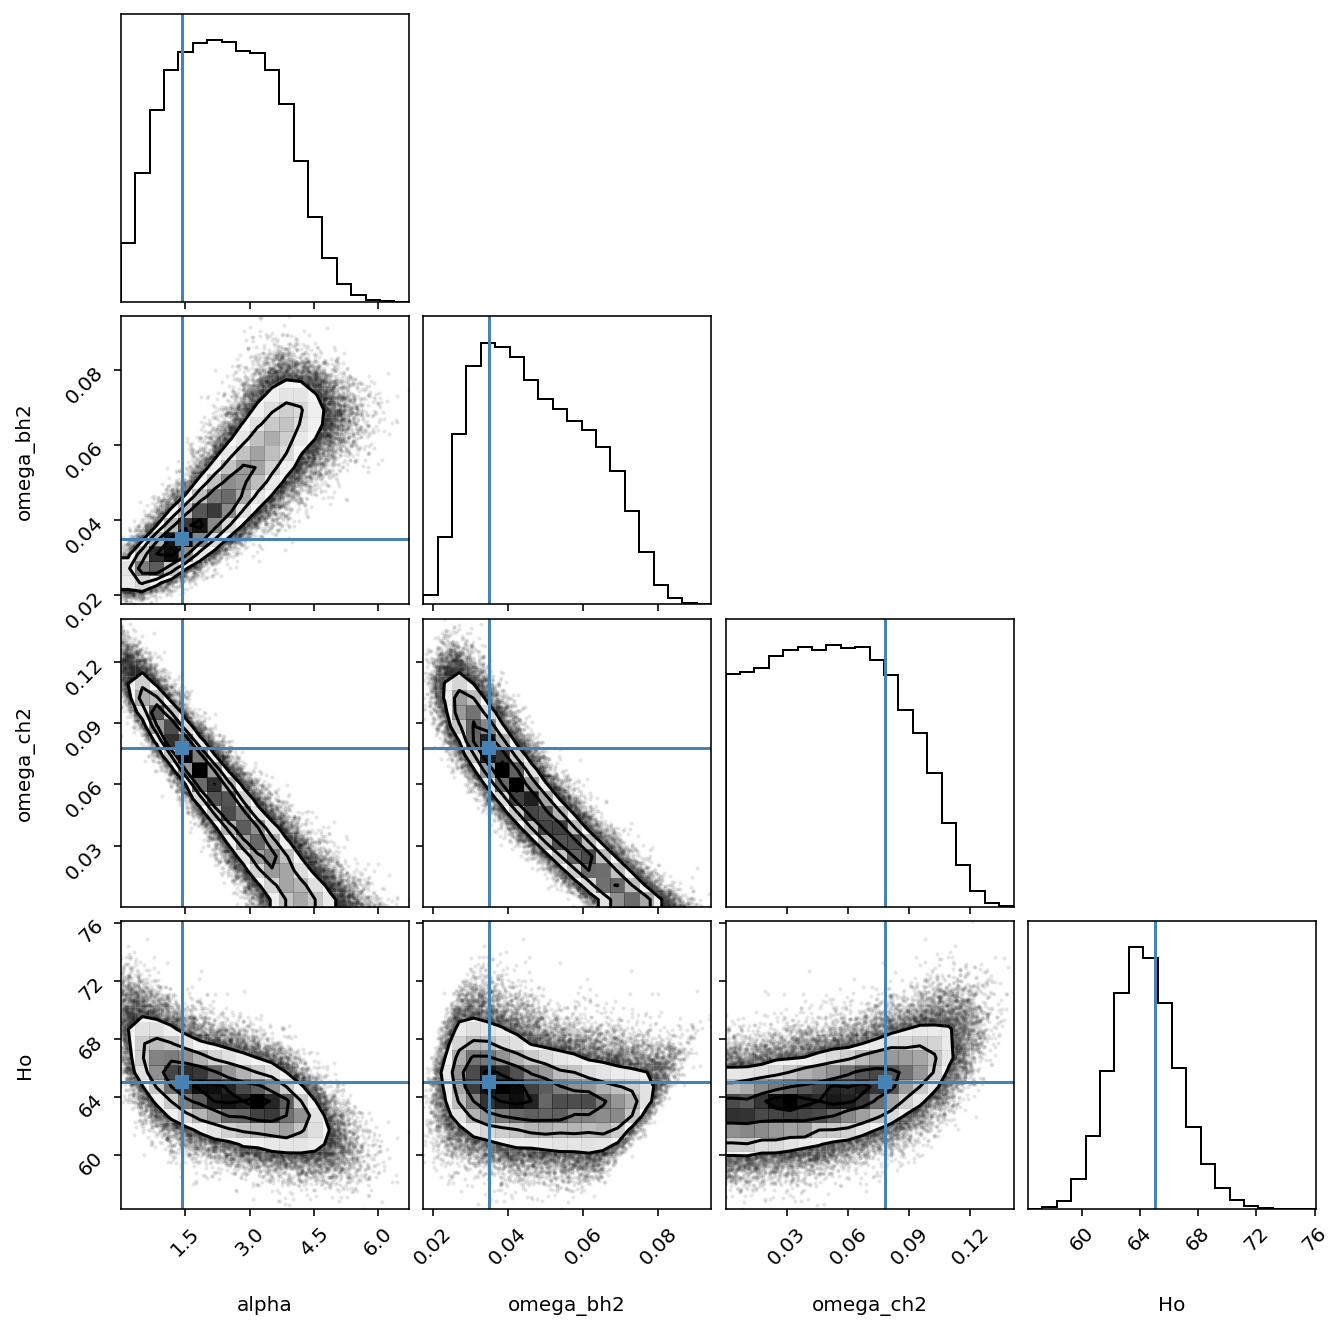

In [55]:
import corner
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
fig = corner.corner(
    flat_samples, labels=labels, truths=[1.43685126e+00, 3.48400410e-02, 7.79196251e-02, 6.50198178e+01])

In [72]:
from IPython.display import display, Math

for i in range(4):
    if( i ==3):
        mcmc = np.percentile(flat_samples[:, i], [31.73, 50, 68.27])
        q = np.diff(mcmc)
        minimum = mcmc[1]-q[0]
        maximum = mcmc[1]+q[1]
        print(f"{minimum} $\le \Omega \ge$ {maximum}")
        txt = "\mathrm{{{2}}} = {0:.4f} \pm {{{1:.4f}}}"
        txt = txt.format(mcmc[1], q[0], labels[i])
        display(Math(txt))
    if(i<4):
        #mcmc = np.percentile(flat_samples[:, i], [4.55, 50, 95.45])
        mcmc = np.percentile(flat_samples[:, i], [5.55, 50, 94.45])
        q = np.diff(mcmc)
        minimum = mcmc[1]-q[0]
        maximum = mcmc[1]+q[1]
        #print(f"{minimum} $\le \Omega \ge$ {maximum}")
        txt = "\mathrm{{{3}}} = {0:.4f}_{{{1:.4f}}}^{{{2:.4f}}}"
        txt = txt.format(mcmc[1], -q[0], +q[1], labels[i])
        display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

63.25218127201884 $\le \Omega \ge$ 65.36926158892034


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.4, Matplotlib version: 3.5.1


In [58]:
names = ["alpha","omega_bh2","omega_ch2","Ho"]
labels =  ["alpha","\Omega_{b} h^2","\Omega_{c} h^2","H_o"]
samples2 = MCSamples(samples=flat_samples,names = names, labels = labels)

Removed no burn in


<Figure size 432x324 with 0 Axes>

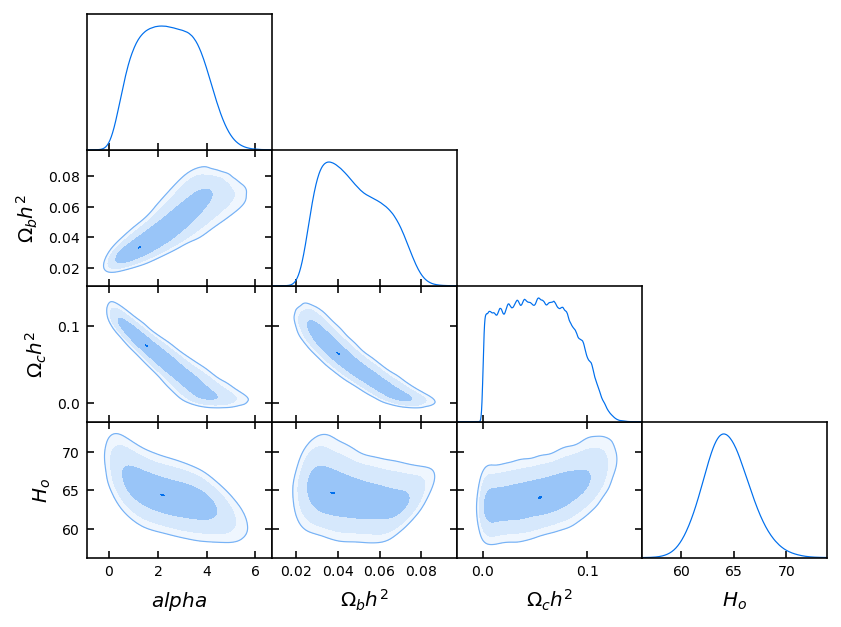

In [59]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.triangle_plot([samples2], filled=True);

In [60]:
p = samples2.getParams() 
print(p)
assert np.all(p.alpha == samples2['alpha'])
samples2.addDerived((0.06/93.14+ p.omega_bh2+ p.omega_ch2)/(p.Ho/100)**2, name='omega', label='\Omega_m')


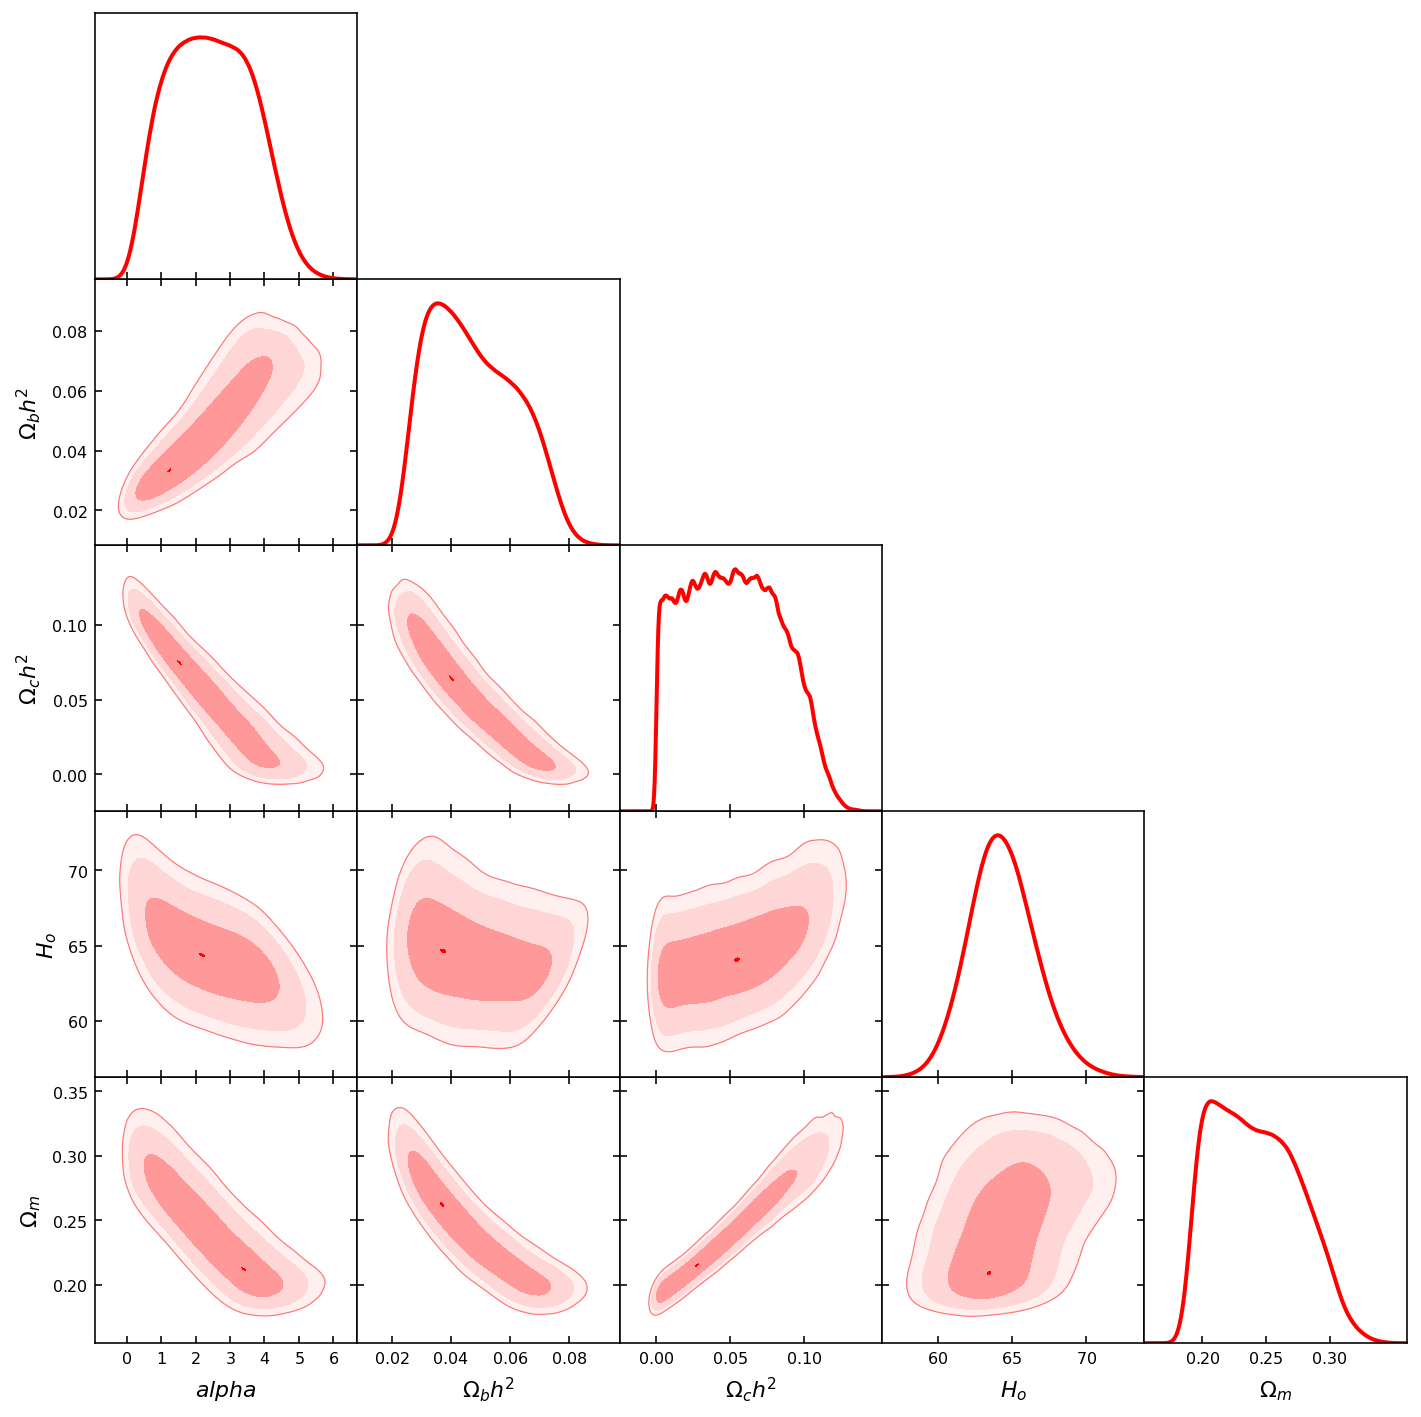

In [61]:
from matplotlib import cm
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.num_plot_contours = 4
g.settings.solid_colors='tab10'
g.triangle_plot([samples2], filled=True,contour_lws=2, contour_colors=['red']);
g.export("BAO_LCDM.png")

In [62]:
print(samples2.getInlineLatex('omega',limit=1))

\Omega_m = 0.242\pm 0.033


In [71]:
for i in ["alpha","omega_bh2","omega_ch2","Ho","omega"]:
    print(samples2.getInlineLatex(i,limit=2))

alpha = 2.4^{+1.2}_{-1.4}
\Omega_{b} h^2 = 0.048^{+0.011}_{-0.020}
\Omega_{c} h^2 = 0.053^{+0.028}_{-0.047}
H_o = 64.4^{+2.0}_{-2.4}
\Omega_m = 0.242^{+0.025}_{-0.045}


In [45]:
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["alpha", "omega_bh2", "omega_ch2", "Ho"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

[68.07061086 72.78740764 72.28871801 55.18138667]
burn-in: 145
thin: 27
flat chain shape: (28400, 4)


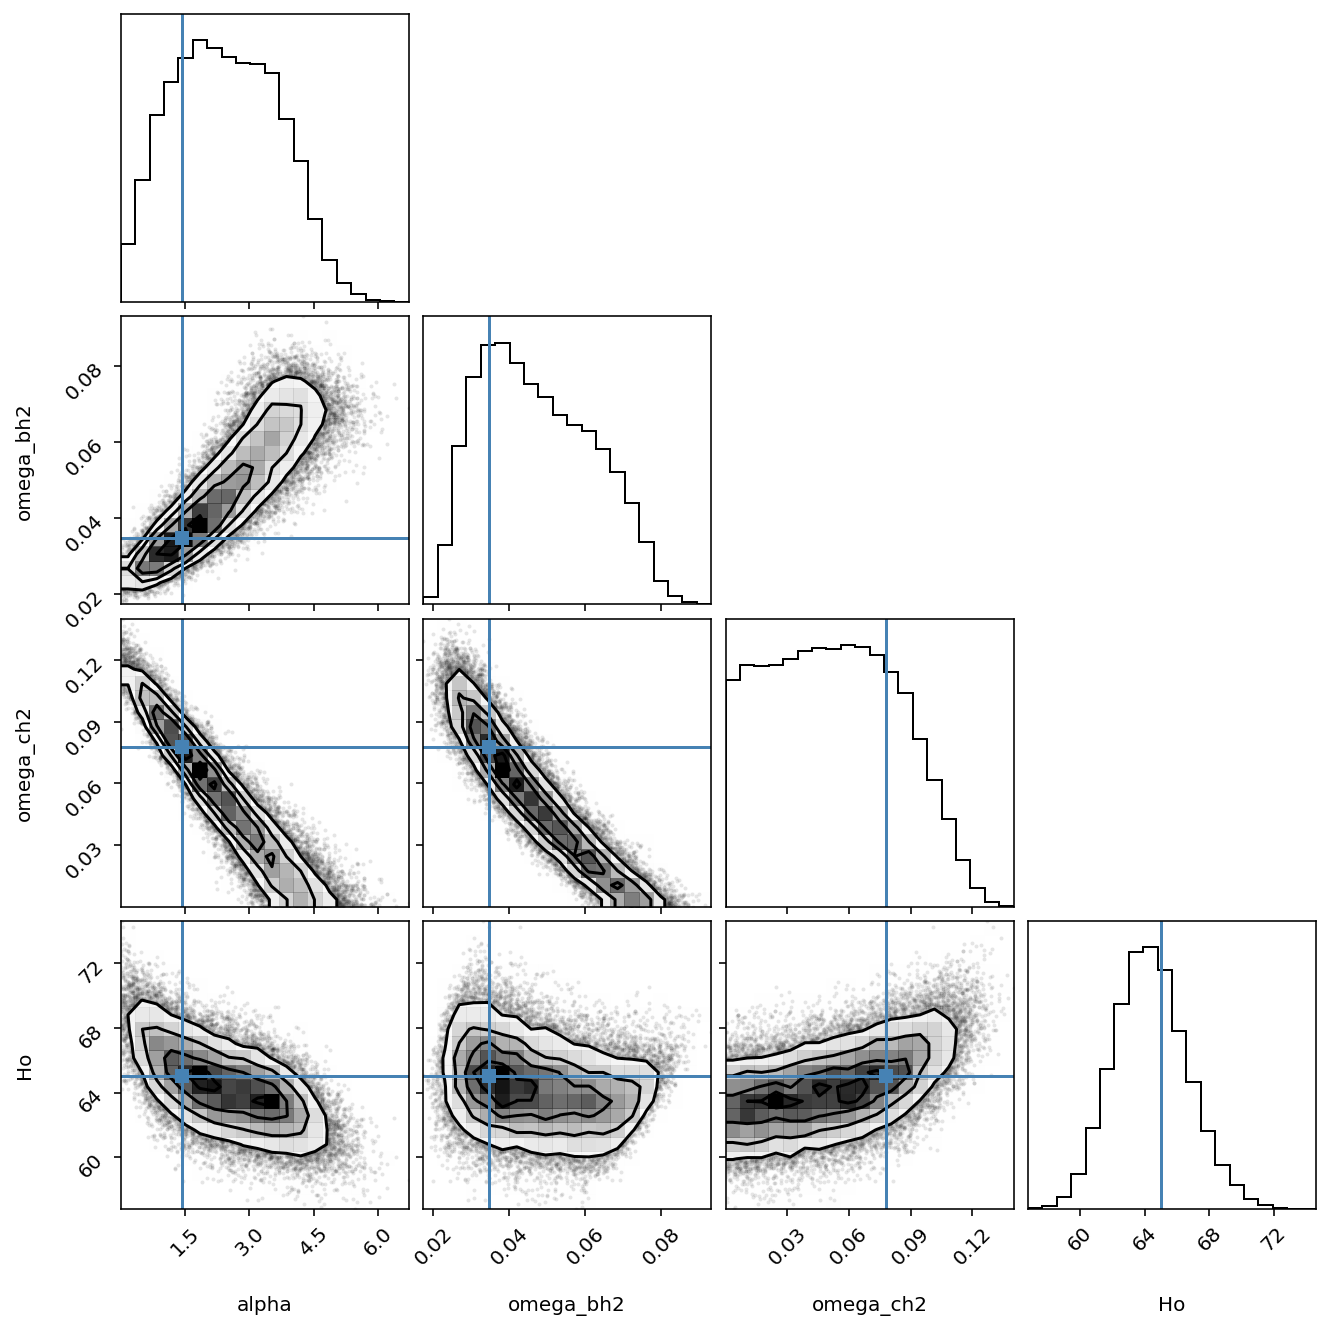

In [46]:
import corner
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
fig = corner.corner(
    flat_samples, labels=labels, truths=[1.43690e+00, 3.48000e-02 ,7.79000e-02, 6.50198e+01])

In [47]:
from IPython.display import display, Math

for i in range(4):
#     if(i==2 or i ==3):
#         mcmc = np.percentile(flat_samples[:, i], [31.73, 50, 68.27])
#         q = np.diff(mcmc)
#         minimum = mcmc[1]-q[0]
#         maximum = mcmc[1]+q[1]
#         #print(f"{minimum} $\le \Omega \ge$ {maximum}")
#         txt = "\mathrm{{{2}}} = {0:.4f} \pm {{{1:.4f}}}"
#         txt = txt.format(mcmc[1], q[0], labels[i])
#         display(Math(txt))
    if(i<4):
        mcmc = np.percentile(flat_samples[:, i], [4.55, 50, 95.45])
        q = np.diff(mcmc)
        minimum = mcmc[1]-q[0]
        maximum = mcmc[1]+q[1]
        #print(f"{minimum} $\le \Omega \ge$ {maximum}")
        txt = "\mathrm{{{3}}} = {0:.4f}_{{{1:.4f}}}^{{{2:.4f}}}"
        txt = txt.format(mcmc[1], -q[0], +q[1], labels[i])
        display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.4, Matplotlib version: 3.5.1


In [49]:
names = ["alpha","omega_bh2","omega_ch2","Ho"]
labels =  ["alpha","\Omega_{b} h^2","\Omega_{c} h^2","H_o"]
samples2 = MCSamples(samples=flat_samples,names = names, labels = labels)

Removed no burn in


<Figure size 432x324 with 0 Axes>

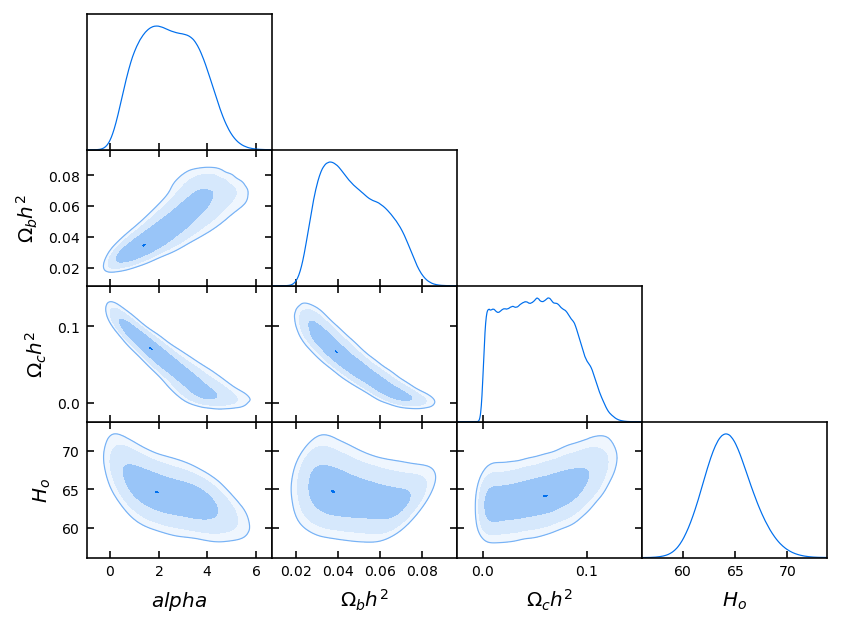

In [50]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.triangle_plot([samples2], filled=True);

In [51]:
p = samples2.getParams() 
print(p)
assert np.all(p.alpha == samples2['alpha'])
samples2.addDerived((0.06/93.14+ p.omega_bh2+ p.omega_ch2)/(p.Ho/100)**2, name='omega', label='\Omega_m')



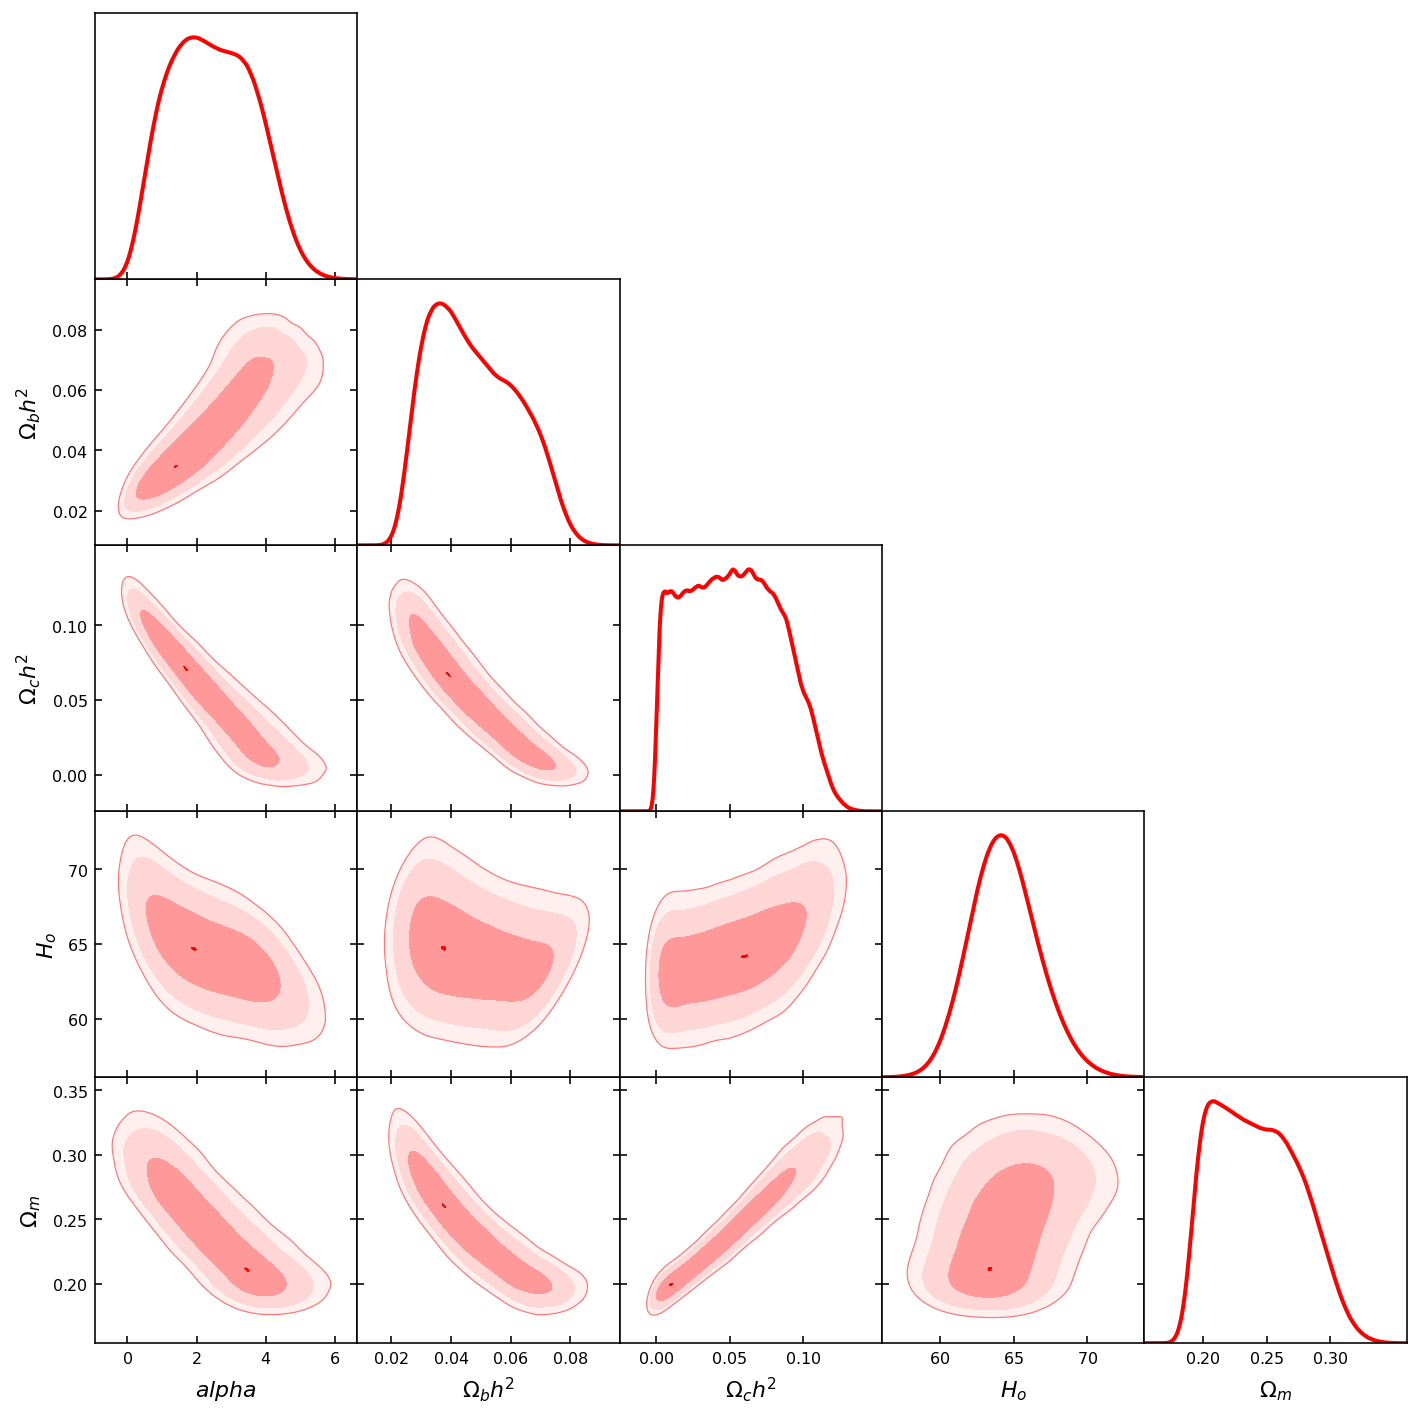

In [52]:
from matplotlib import cm
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.num_plot_contours = 4
g.settings.solid_colors='tab10'
g.triangle_plot([samples2], filled=True,contour_lws=2, contour_colors=['red']);
g.export("BAO_LCDM.png")

In [42]:
print(samples2.getInlineLatex('omega',limit=1))

\Omega_m = 0.241\pm 0.033


In [73]:
print(samples2.getTable().tableTex())
#getdist.types.ResultTable(limit=2)

\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$alpha          $} & $2.4^{+1.2}_{-1.4}         $\\

{\boldmath$\Omega_{b} h^2 $} & $0.048^{+0.011}_{-0.020}   $\\

{\boldmath$\Omega_{c} h^2 $} & $0.053^{+0.028}_{-0.047}   $\\

{\boldmath$H_o            $} & $64.4^{+2.0}_{-2.4}        $\\

$\Omega_m                  $ & $0.242^{+0.025}_{-0.045}   $\\
\hline
\end{tabular}


In [69]:
for i in ["alpha","omega_bh2","omega_ch2","Ho","omega"]:
    print(samples2.getInlineLatex(i,limit=2))

alpha = 2.4^{+1.2}_{-1.4}
\Omega_{b} h^2 = 0.048^{+0.011}_{-0.020}
\Omega_{c} h^2 = 0.053^{+0.028}_{-0.047}
H_o = 64.4^{+2.0}_{-2.4}
\Omega_m = 0.242^{+0.025}_{-0.045}
